# Load basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as ms

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [3]:
df=pd.read_csv(r'C:\Users\ABHI\INEURON\PROJECTS\ADULT CENSUS PREDICTION\adult.csv')
df.head(20)

age          workclass  fnlwgt      education  education-num  \
0    39          State-gov   77516      Bachelors             13   
1    50   Self-emp-not-inc   83311      Bachelors             13   
2    38            Private  215646        HS-grad              9   
3    53            Private  234721           11th              7   
4    28            Private  338409      Bachelors             13   
5    37            Private  284582        Masters             14   
6    49            Private  160187            9th              5   
7    52   Self-emp-not-inc  209642        HS-grad              9   
8    31            Private   45781        Masters             14   
9    42            Private  159449      Bachelors             13   
10   37            Private  280464   Some-college             10   
11   30          State-gov  141297      Bachelors             13   
12   23            Private  122272      Bachelors             13   
13   32            Private  205019     Assoc-acdm             12   
14   40            Private  121772      Assoc-voc             11   
15   34            Private  245487        7th-8th              4   
16   25   Self-emp-not-inc  176756        HS-grad              9   
17   32            Private  186824        HS-grad              9   
18   38            Private   28887           11th              7   
19   43   Self-emp-not-inc  292175        Masters             14   

            marital-status          occupation    relationship  \
0            Never-married        Adm-clerical   Not-in-family   
1       Married-civ-spouse     Exec-managerial         Husband   
2                 Divorced   Handlers-cleaners   Not-in-family   
3       Married-civ-spouse   Handlers-cleaners         Husband   
4       Married-civ-spouse      Prof-specialty            Wife   
5       Married-civ-spouse     Exec-managerial            Wife   
6    Married-spouse-absent       Other-service   Not-in-family   
7       Married-civ-spouse     Exec-managerial         Husband   
8            Never-married      Prof-specialty   Not-in-family   
9       Married-civ-spouse     Exec-managerial         Husband   
10      Married-civ-spouse     Exec-managerial         Husband   
11      Married-civ-spouse      Prof-specialty         Husband   
12           Never-married        Adm-clerical       Own-child   
13           Never-married               Sales   Not-in-family   
14      Married-civ-spouse        Craft-repair         Husband   
15      Married-civ-spouse    Transport-moving         Husband   
16           Never-married     Farming-fishing       Own-child   
17           Never-married   Machine-op-inspct       Unmarried   
18      Married-civ-spouse               Sales         Husband   
19                Divorced     Exec-managerial       Unmarried   

                   race      sex  capital-gain  capital-loss  hours-per-week  \
0                 White     Male          2174             0              40   
1                 White     Male             0             0              13   
2                 White     Male             0             0              40   
3                 Black     Male             0             0              40   
4                 Black   Female             0             0              40   
5                 White   Female             0             0              40   
6                 Black   Female             0             0              16   
7                 White     Male             0             0              45   
8                 White   Female         14084             0              50   
9                 White     Male          5178             0              40   
10                Black     Male             0             0              80   
11   Asian-Pac-Islander     Male             0             0              40   
12                White   Female             0             0              30   
13                Black     Male             0             0        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df_new=df.copy()
df_new.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week         country  salary  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [6]:
df_new.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

# removing extra whitespace in all values

In [7]:
list_of_values=[]
for i in df_new.columns:
    if df_new[i].dtypes==object:
        list_of_values=[]
        for j in df_new[i]:
            list_of_values.append(j.strip())
        df_new[i]=list_of_values       

In [8]:
del df

In [9]:
df=df_new.copy()

In [10]:
df

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week        country salary  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[32561 rows x 15 columns]

In [11]:
df.shape

(32561, 15)

In [12]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [13]:
df['salary'].value_counts(normalize = True)*100

<=50K    75.919044
>50K     24.080956
Name: salary, dtype: float64

### Here we can see that 75.9% people have income below 50k and remaining have income above 50k,so the data here is skewed

<AxesSubplot:title={'center':'Null Values Plot'}>

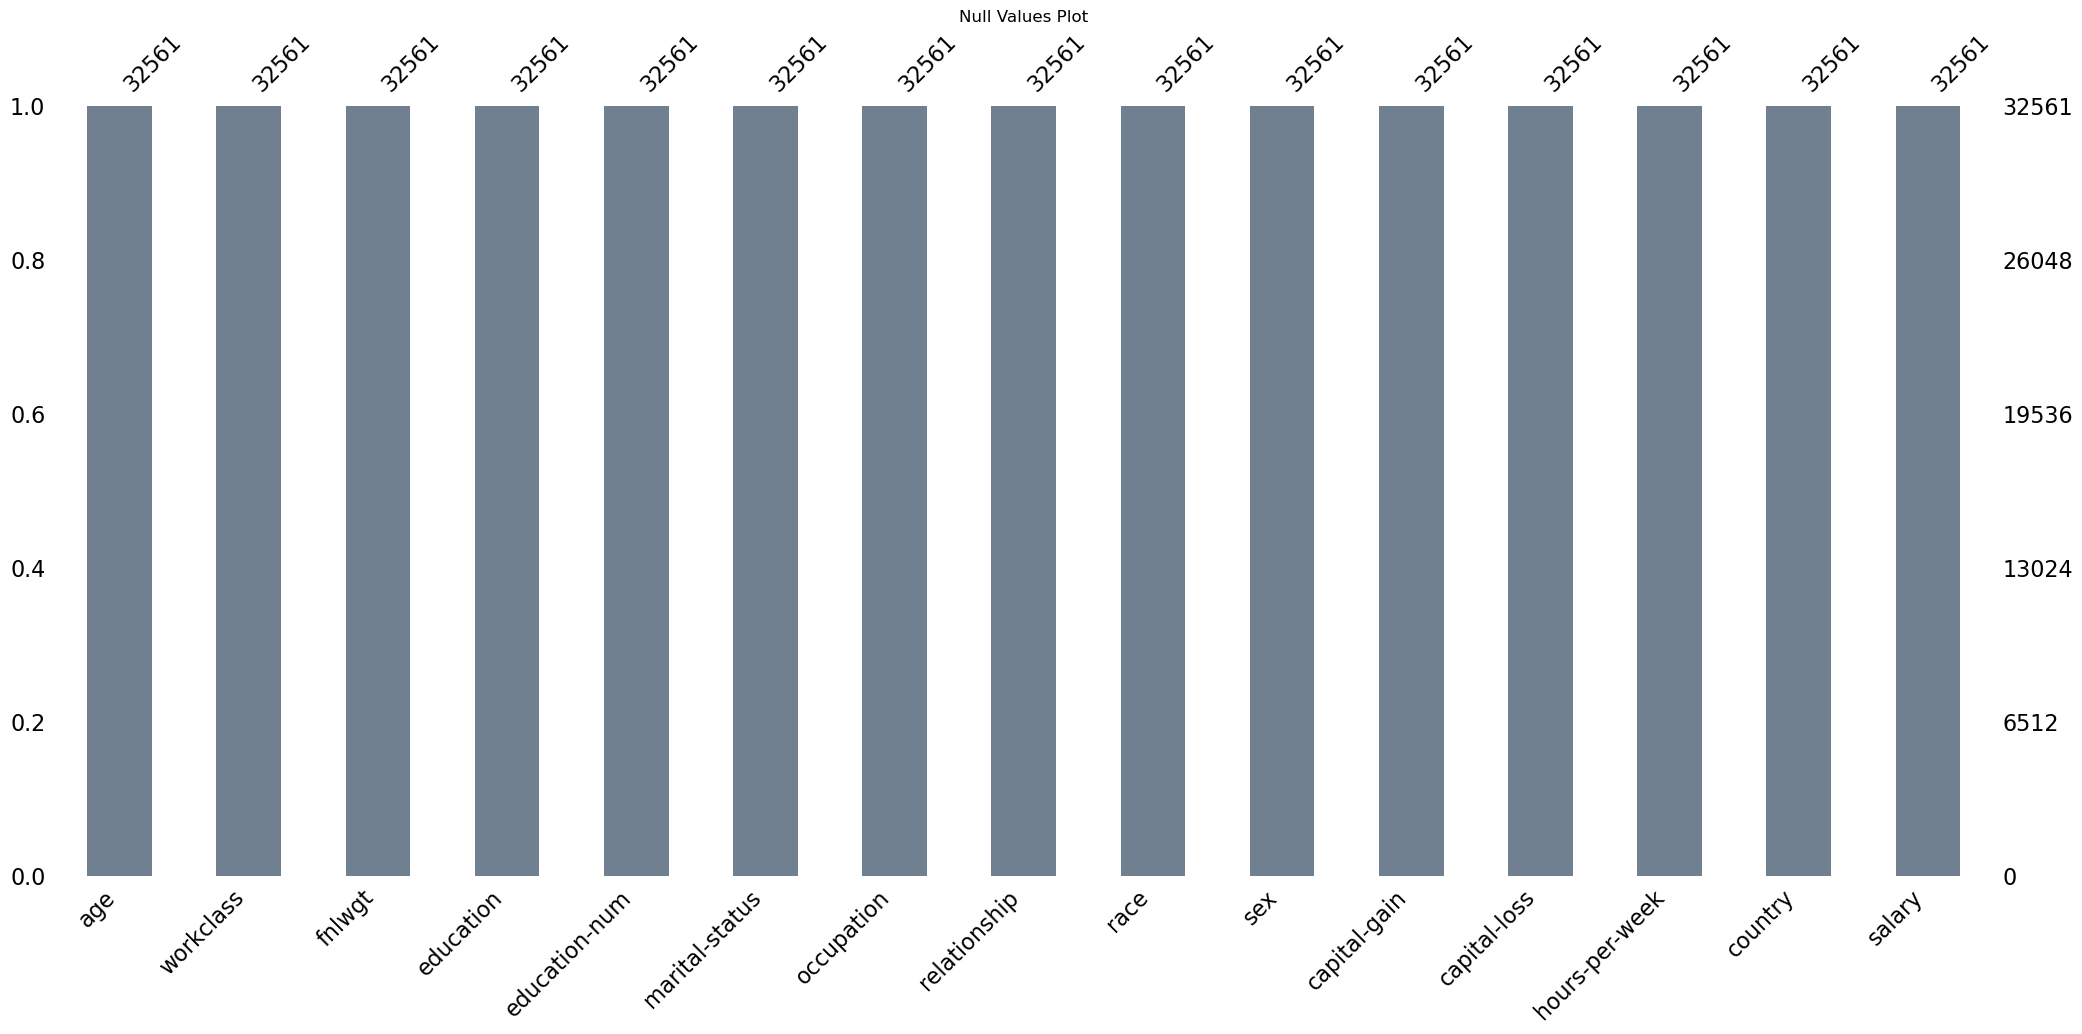

In [14]:
plt.title("Null Values Plot")
ms.bar(df, color = 'slategrey')

In [15]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [16]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
country              42
salary                2
dtype: int64

In [17]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [18]:
# Checking the counts of categories
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

### we have noticed that data does not contains any null values but it has question marks as highlighted above. So we have options either we can drop those values or can replace them with nan values & furtur hadle null values.

In [19]:
df[df['workclass']=='?']

age workclass  fnlwgt     education  education-num  \
27      54         ?  180211  Some-college             10   
61      32         ?  293936       7th-8th              4   
69      25         ?  200681  Some-college             10   
77      67         ?  212759          10th              6   
106     17         ?  304873          10th              6   
...    ...       ...     ...           ...            ...   
32530   35         ?  320084     Bachelors             13   
32531   30         ?   33811     Bachelors             13   
32539   71         ?  287372     Doctorate             16   
32541   41         ?  202822       HS-grad              9   
32542   72         ?  129912       HS-grad              9   

              marital-status occupation   relationship                race  \
27        Married-civ-spouse          ?        Husband  Asian-Pac-Islander   
61     Married-spouse-absent          ?  Not-in-family               White   
69             Never-married          ?      Own-child               White   
77        Married-civ-spouse          ?        Husband               White   
106            Never-married          ?      Own-child               White   
...                      ...        ...            ...                 ...   
32530     Married-civ-spouse          ?           Wife               White   
32531          Never-married          ?  Not-in-family  Asian-Pac-Islander   
32539     Married-civ-spouse          ?        Husband               White   
32541              Separated          ?  Not-in-family               Black   
32542     Married-civ-spouse          ?        Husband               White   

          sex  capital-gain  capital-loss  hours-per-week        country  \
27       Male             0             0              60          South   
61       Male             0             0              40              ?   
69       Male             0             0              40  United-States   
77       Male             0             0               2  United-States   
106    Female         34095             0              32  United-States   
...       ...           ...           ...             ...            ...   
32530  Female             0             0              55  United-States   
32531  Female             0             0              99  United-States   
32539    Male             0             0              10  United-States   
32541  Female             0             0              32  United-States   
32542    Male             0             0              25  United-States   

      salary  
27      >50K  
61     <=50K  
69     <=50K  
77     <=50K  
106    <=50K  
...      ...  
32530   >50K  
32531  <=50K  
32539   >50K  
32541  <=50K  
32542  <=50K  

[1836 rows x 15 columns]

In [20]:
df.describe().T

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education-num   32561.0      10.080679       2.572720      1.0       9.0   
capital-gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital-loss    32561.0      87.303830     402.960219      0.0       0.0   
hours-per-week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education-num       10.0      12.0       16.0  
capital-gain         0.0       0.0    99999.0  
capital-loss         0.0       0.0     4356.0  
hours-per-week      40.0      45.0       99.0

In [21]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

# EDA

## Univariate Analysis

### WE shall look into the

Histogram to study the shape of the numeric data

BoxPlot to have an idea of outliers

Correlation plot to study the correlation among the numeric variables

Plotly Pie charts

Plotly Scatter Charts

Countplot for the salary variable

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

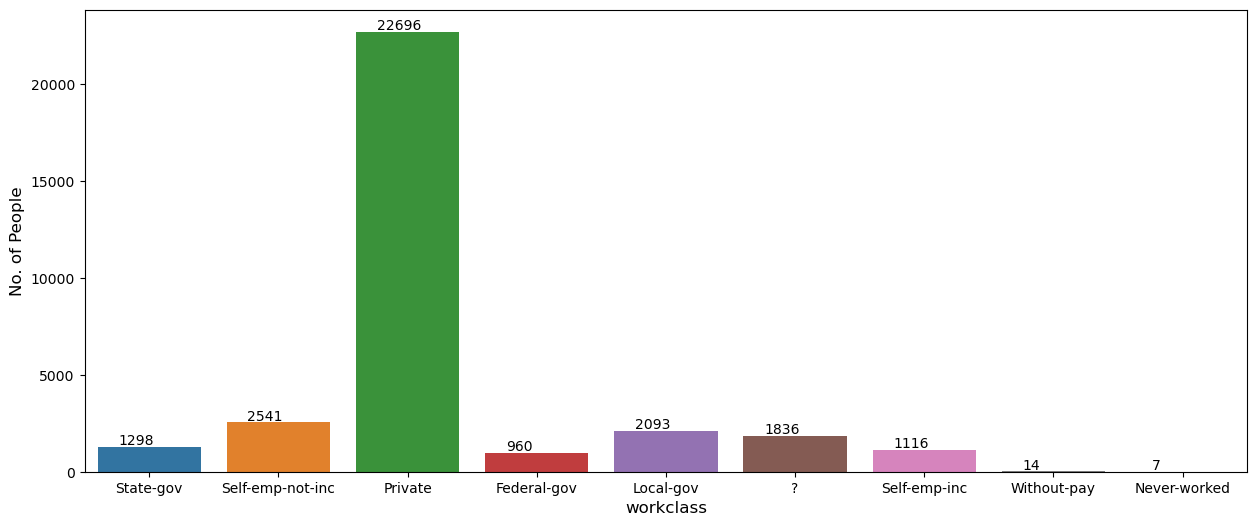

In [22]:
plt.figure(figsize=(15,6))
ax=sns.countplot(data=df,x='workclass')
plt.xlabel("workclass", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+100))

df['workclass'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

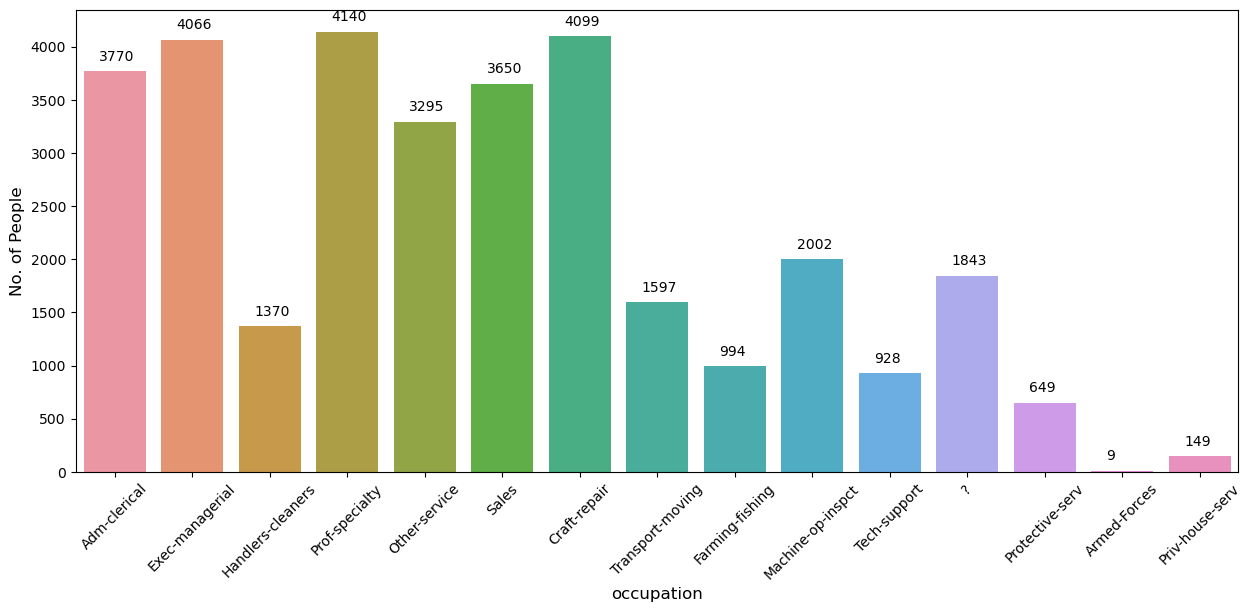

In [23]:
plt.figure(figsize=(15,6))
ax=sns.countplot(data=df,x='occupation')
plt.xlabel("occupation", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+100))
plt.xticks(rotation=45)

df['occupation'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

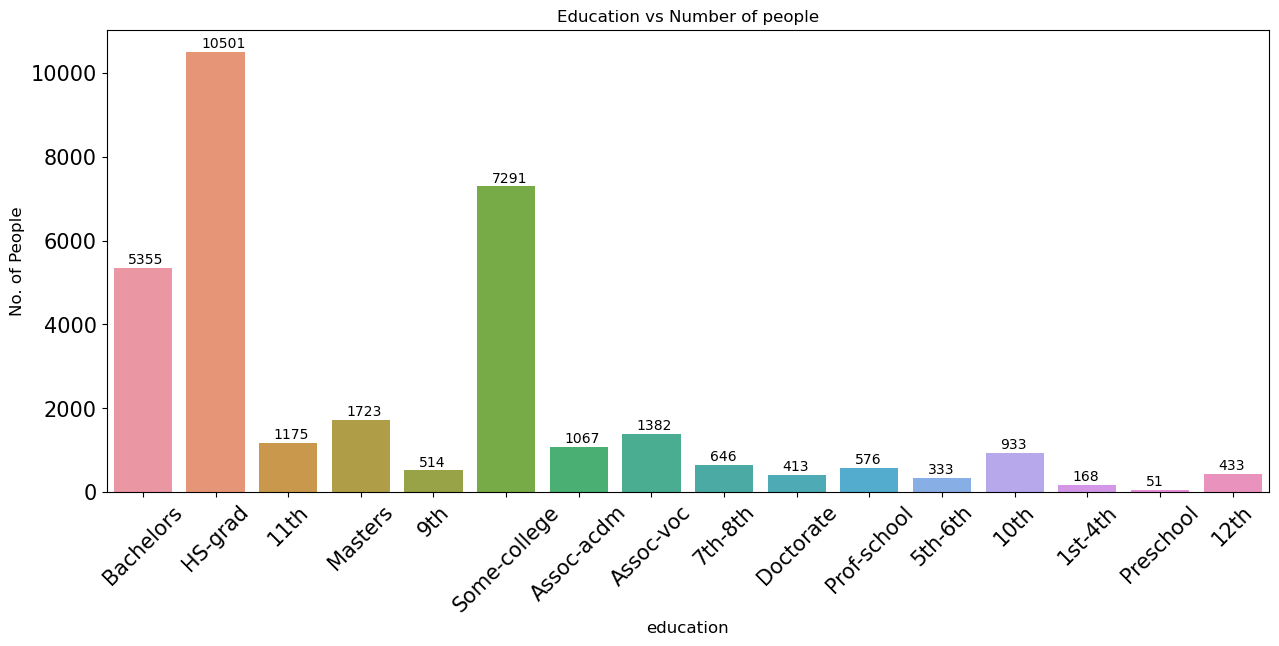

In [24]:
plt.figure(figsize=(15,6))
ax=sns.countplot(data=df,x='education')
plt.xlabel("education", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
plt.title('Education vs Number of people')
plt.tick_params(labelsize=15)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+100))
plt.xticks(rotation=45)

df['education'].value_counts()

## Here we see that the majority of people have completed HS-Grad, College or Bachelors

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

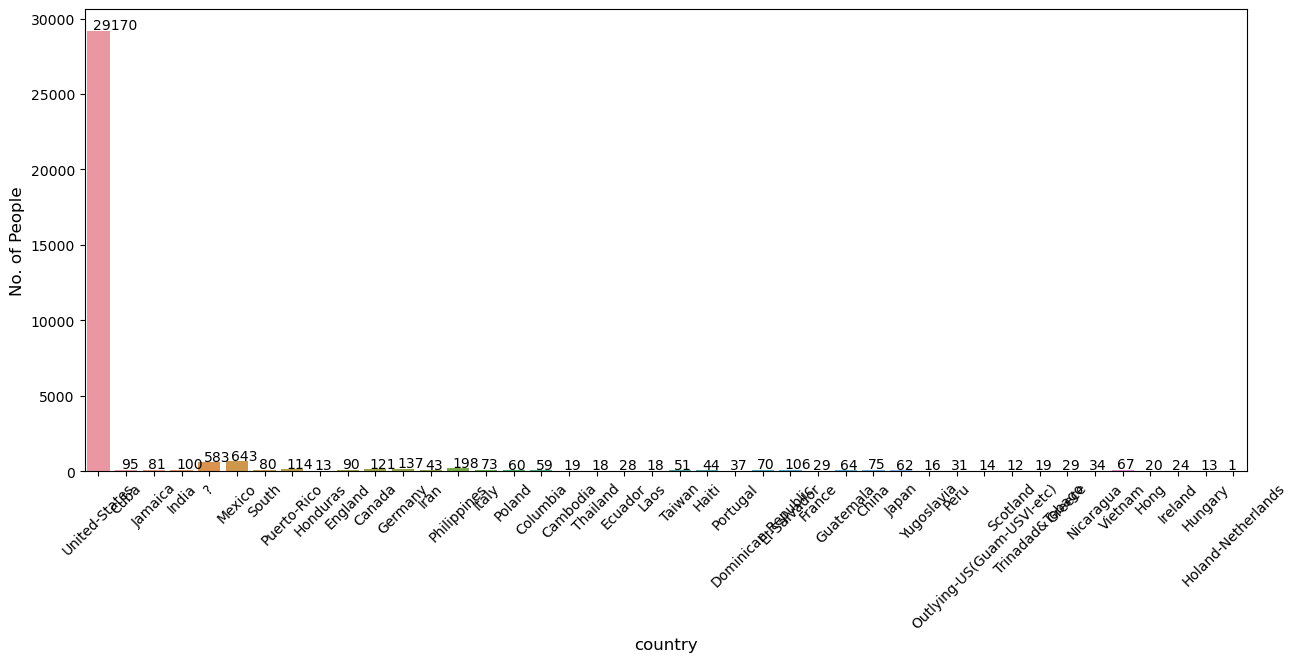

In [25]:
plt.figure(figsize=(15,6))
ax=sns.countplot(data=df,x='country')
plt.xlabel("country", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+100))
plt.xticks(rotation=45)
df['country'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

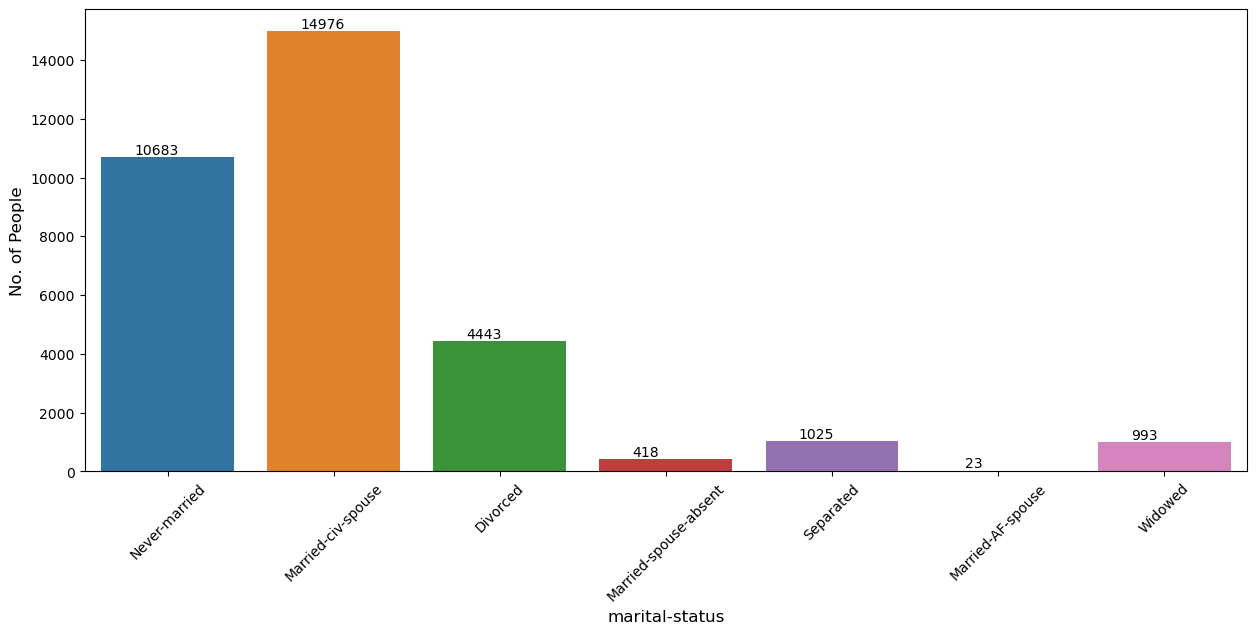

In [26]:
plt.figure(figsize=(15,6))
ax=sns.countplot(data=df,x='marital-status')
plt.xlabel("marital-status", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+100))
plt.xticks(rotation=45)
df['marital-status'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

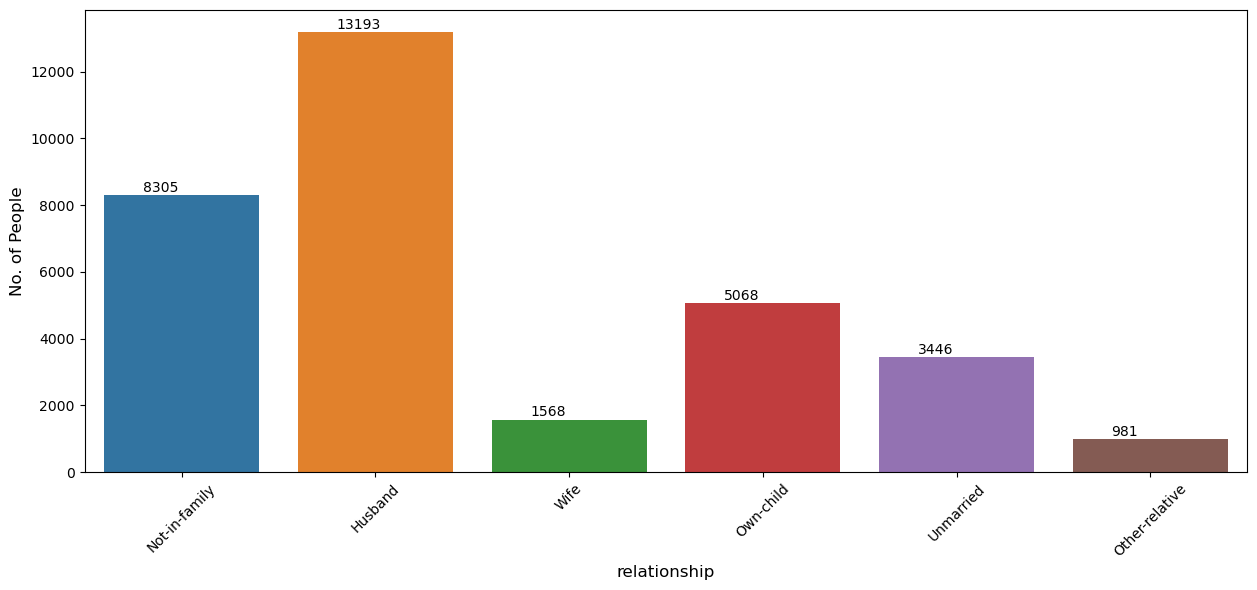

In [27]:
plt.figure(figsize=(15,6))
ax=sns.countplot(data=df,x='relationship')
plt.xlabel("relationship", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+100))
plt.xticks(rotation=45)
df['relationship'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

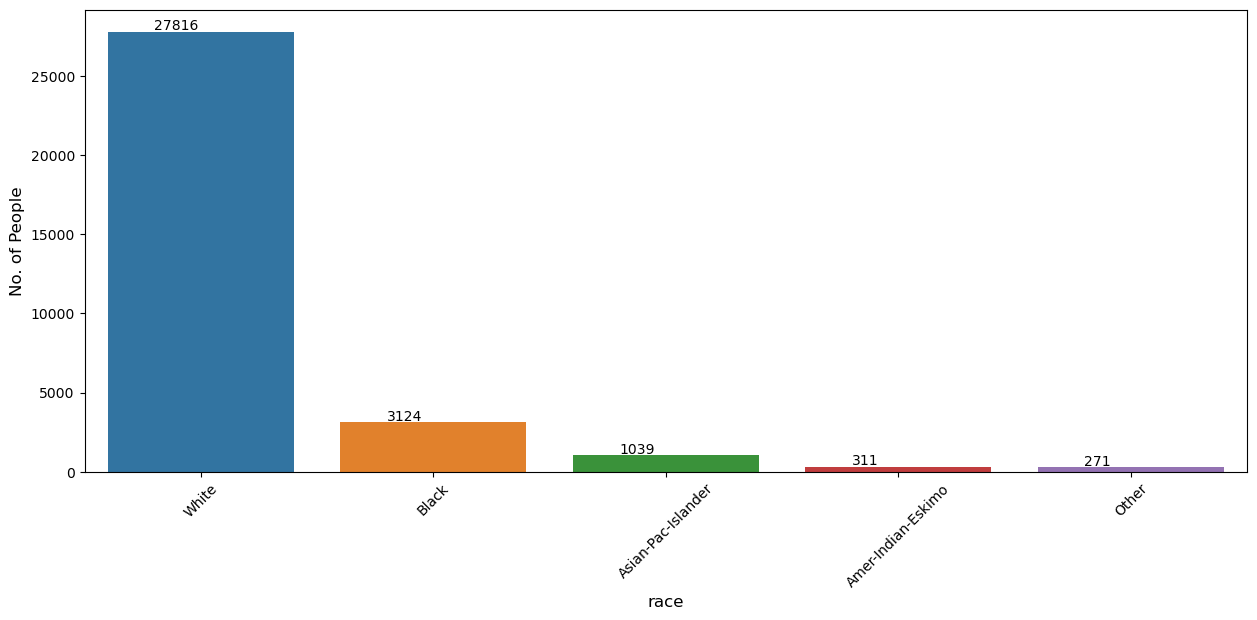

In [28]:
plt.figure(figsize=(15,6))
ax=sns.countplot(data=df,x='race')
plt.xlabel("race", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+100))
plt.xticks(rotation=45)
df['race'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

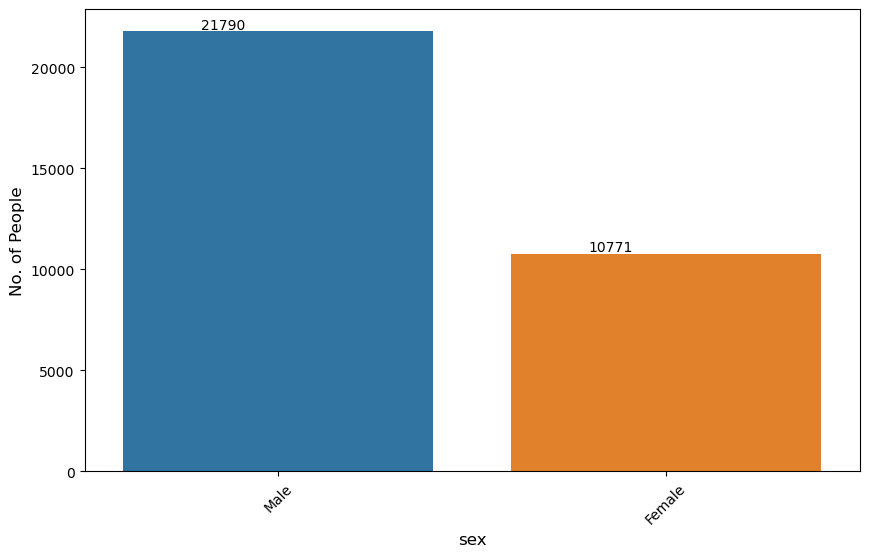

In [29]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df,x='sex')
plt.xlabel("sex", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+100))
plt.xticks(rotation=45)
df['sex'].value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

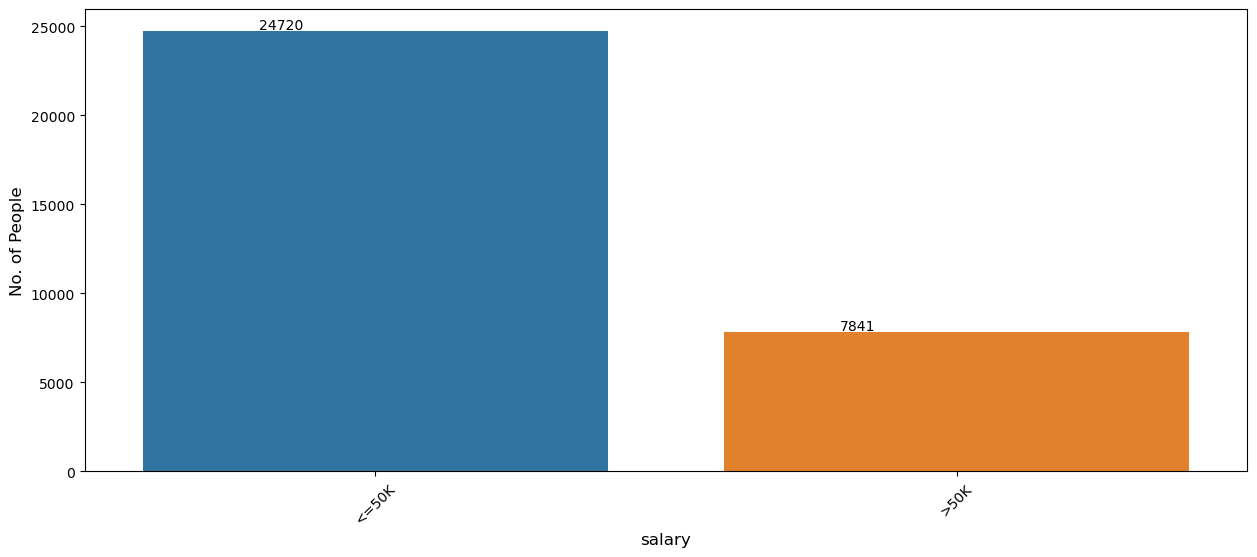

In [30]:
plt.figure(figsize=(15,6))
ax=sns.countplot(data=df,x='salary')
plt.xlabel("salary", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+100))
plt.xticks(rotation=45)
df['salary'].value_counts()

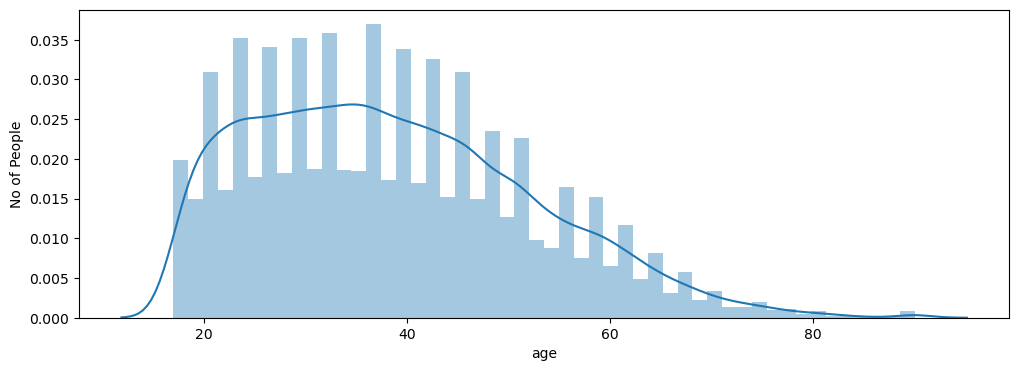

In [31]:
plt.figure(figsize=(12,4))
sns.distplot(df['age'])
plt.ylabel('No of People')
plt.show()

### The Average age is around 38-40 yrs

# Bivariate analysis

(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

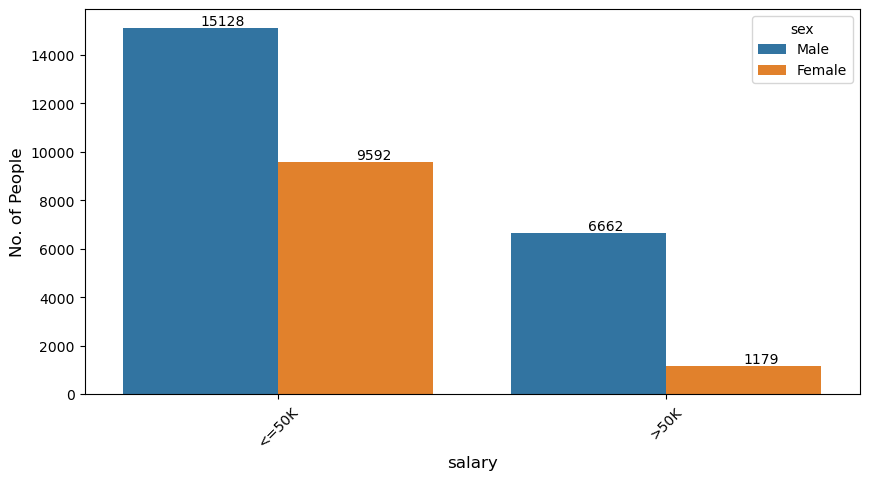

In [32]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='salary',hue='sex')
plt.xlabel("salary", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+100))
plt.xticks(rotation=45)

### There are more men than women in our dataset and, apparently, men have a higher income ratio compared to women.

(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

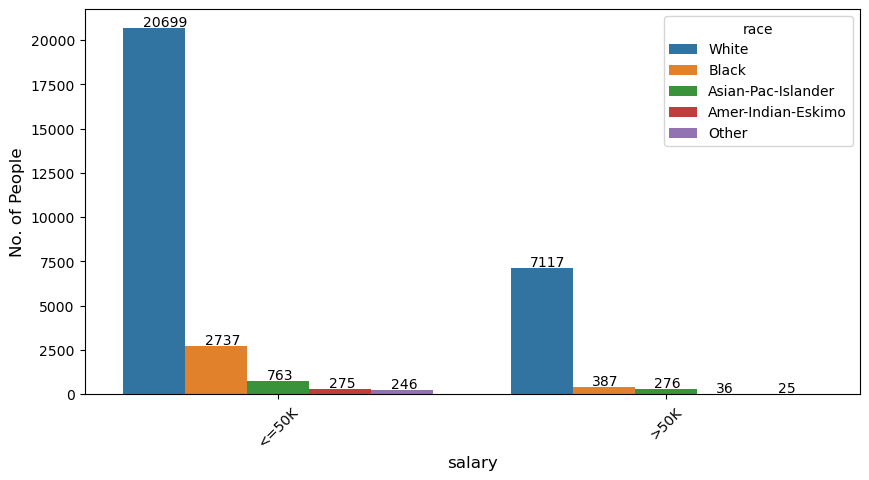

In [33]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='salary',hue='race')
plt.xlabel("salary", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+100))
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

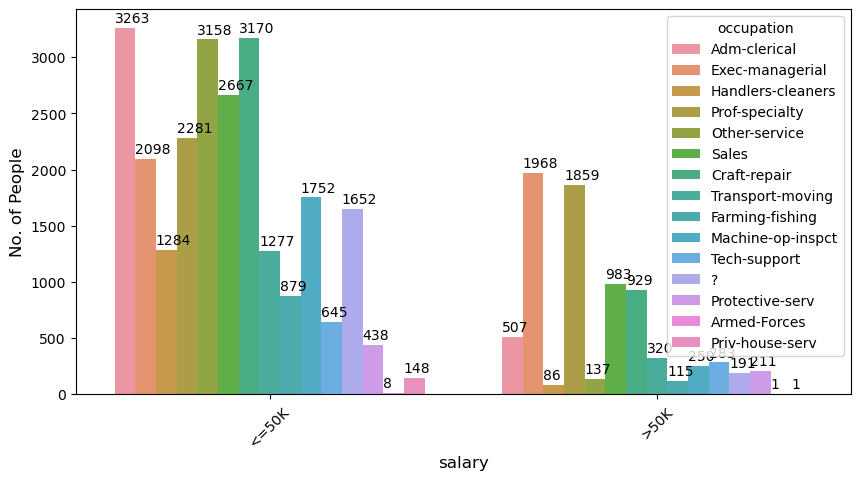

In [34]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='salary',hue='occupation')
plt.xlabel("salary", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.00, p.get_height()+50))
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

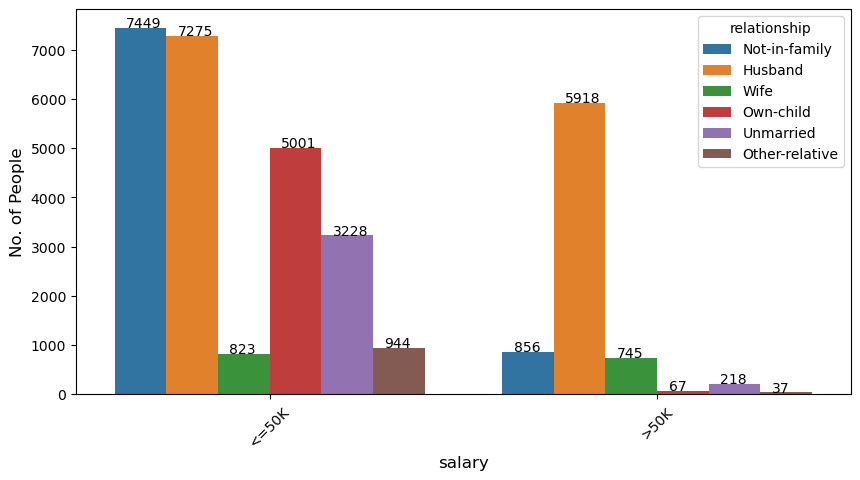

In [35]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='salary',hue='relationship')
plt.xlabel("salary", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.03, p.get_height()+10))
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

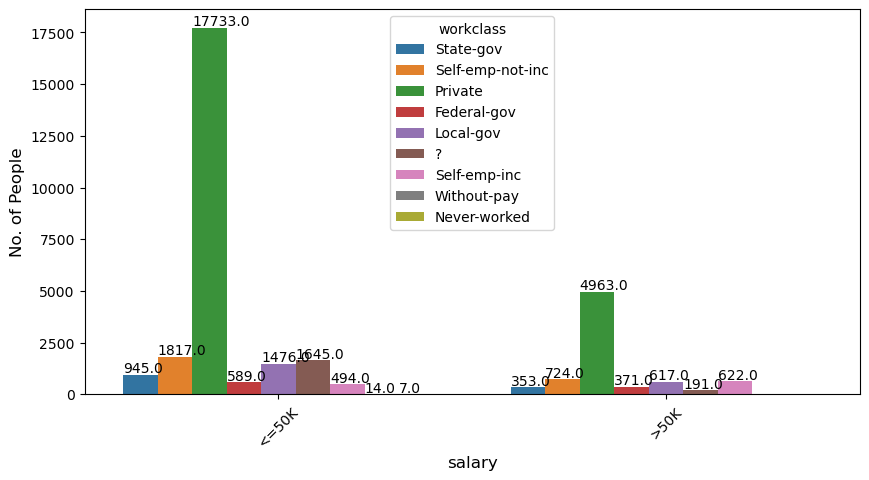

In [36]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='salary',hue='workclass')
plt.xlabel("salary", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.00, p.get_height()+100))
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

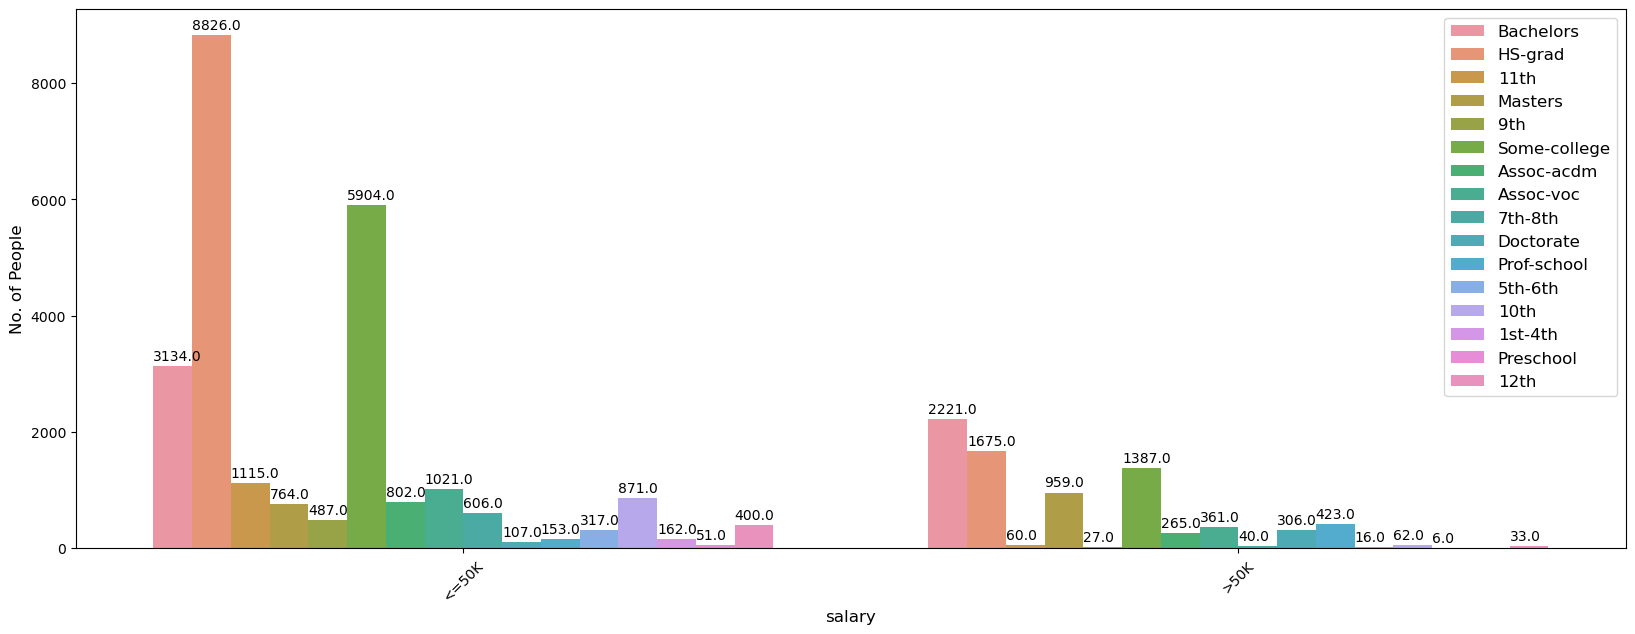

In [37]:
plt.figure(figsize=(20,7))
ax=sns.countplot(data=df,x='salary',hue='education')
plt.xlabel("salary", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
plt.legend(loc=1, prop={'size': 12})
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.00, p.get_height()+100))
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '<=50K'), Text(1, 0, '>50K')])

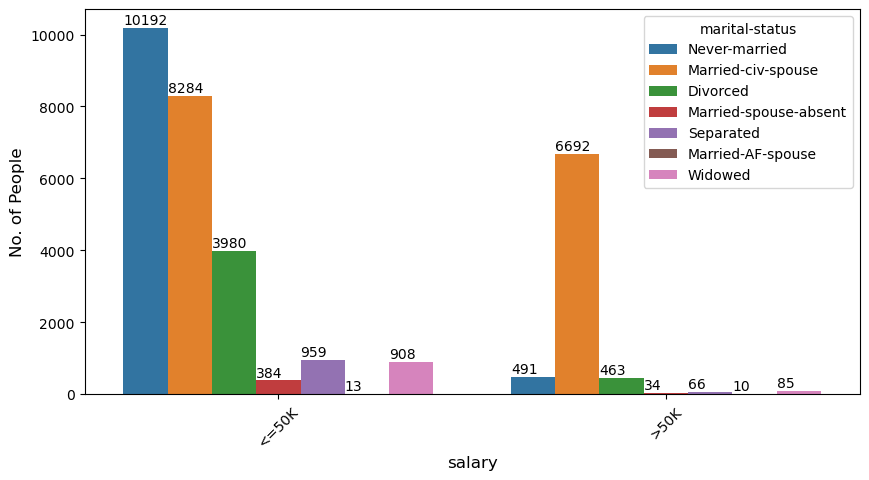

In [38]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='salary',hue='marital-status')
plt.xlabel("salary", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.0, p.get_height()+100))
plt.xticks(rotation=45)

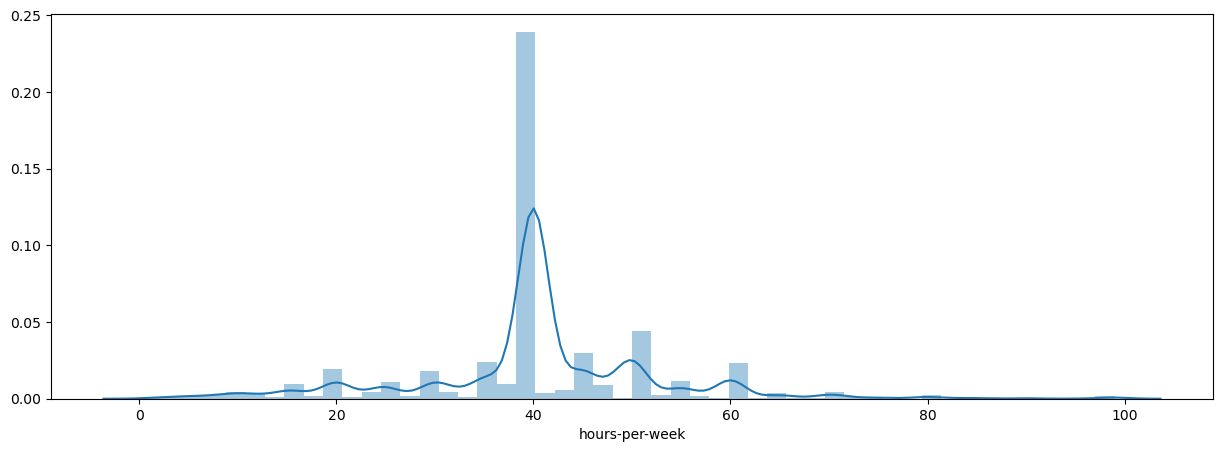

In [39]:
plt.figure(figsize=(15,5))

sns.distplot(df['hours-per-week'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

In [40]:
df["hours-per-week"].mean()

40.437455852092995

### Seems that the average Hours per week put by an individual is 40

# Key Findings

The minimum age is 17 and the maximum is 90 years, most of the working age group lies between 20-40.

The minimum hours-per-week is 1 and maximum is 90, with most of the count lying between 30-40

outliers observed in almost all the numeric features, these are the extreme values that are present in the data.

Not very strong correlation observed among variables.

# Feature Engineering

# filling ? values

### So we will replace '?' with nan values & further handle null values with suitable method.

In [41]:
df.replace('?', np.nan, inplace=True)

In [42]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [43]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [44]:
del df_new

In [45]:
df_new=df.copy()

In [46]:
df_new

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week        country salary  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[32561 rows x 15 columns]

In [47]:
df_new['workclass']=df_new['workclass'].replace(np.nan,df['workclass'].mode()[0])
df_new['country']=df_new['country'].replace(np.nan,df['country'].mode()[0])
df_new['occupation']=df_new['occupation'].replace(np.nan,df['occupation'].mode()[0])

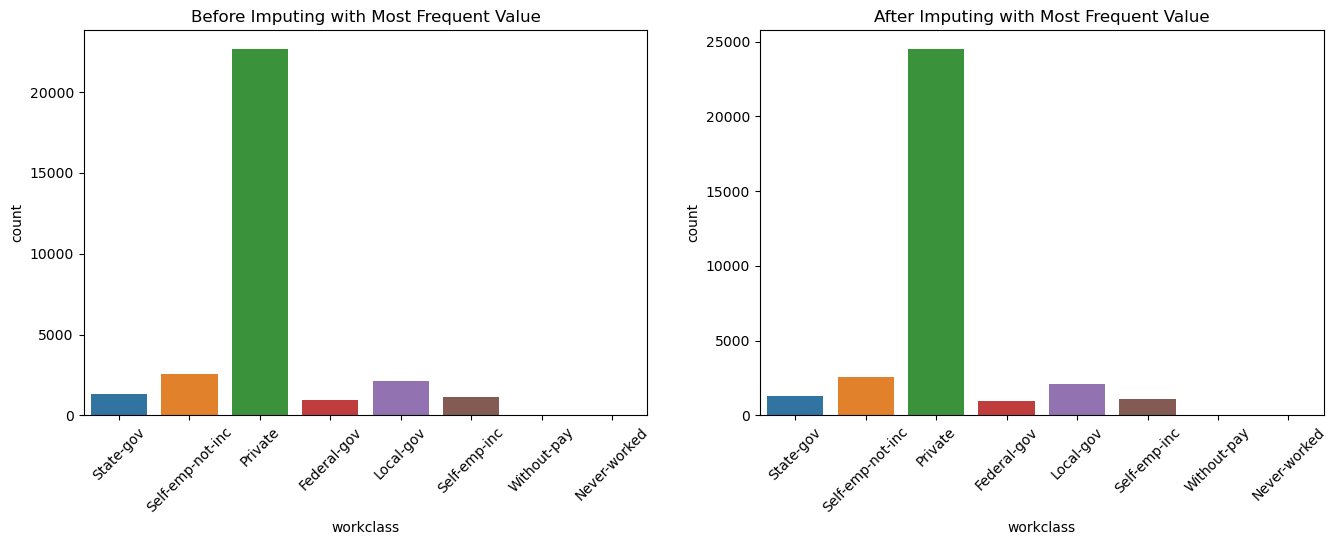

In [48]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("Before Imputing with Most Frequent Value")
sns.countplot(data = df, x = 'workclass')
plt.xticks(rotation=45)
plt.subplot(122)
plt.title("After Imputing with Most Frequent Value")
sns.countplot(data=df_new['workclass'].replace(np.nan,df['workclass'].mode()[0]),x=df_new['workclass'],)
plt.xticks(rotation=45)
plt.show()

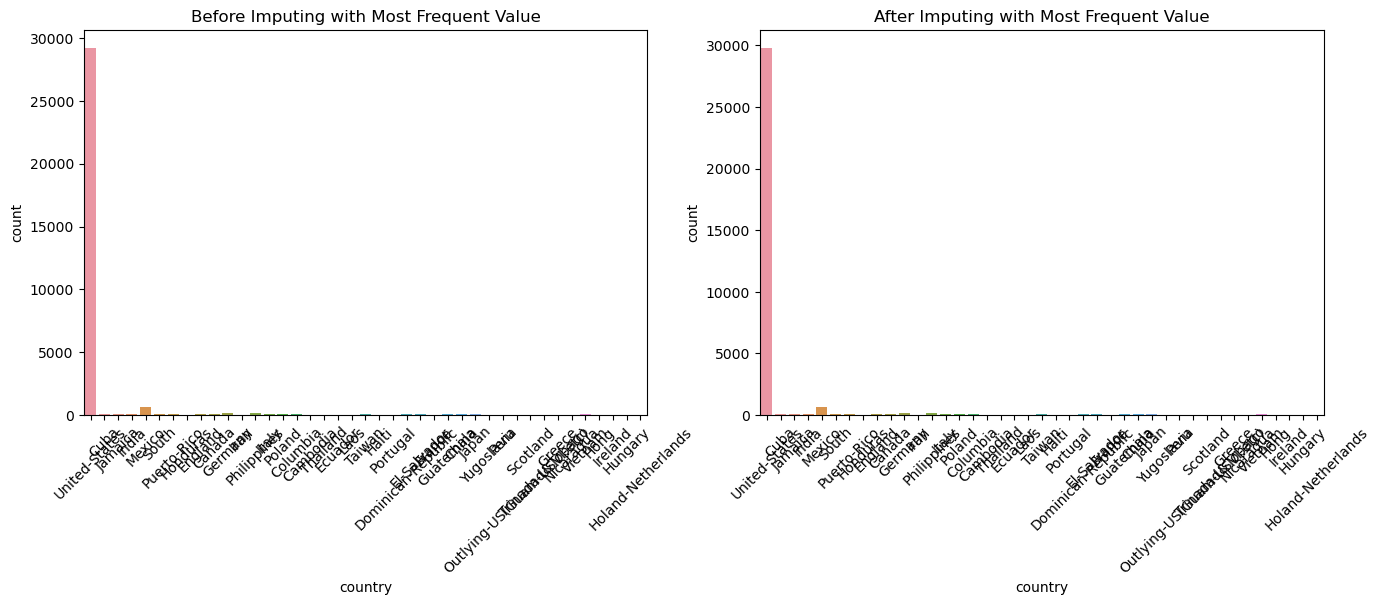

In [49]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("Before Imputing with Most Frequent Value")
sns.countplot(data = df, x = 'country')
plt.xticks(rotation=45)
plt.subplot(122)
plt.title("After Imputing with Most Frequent Value")
sns.countplot(data=df_new['country'].replace(np.nan,df['country'].mode()[0]),x=df_new['country'])
plt.xticks(rotation=45)
plt.show()

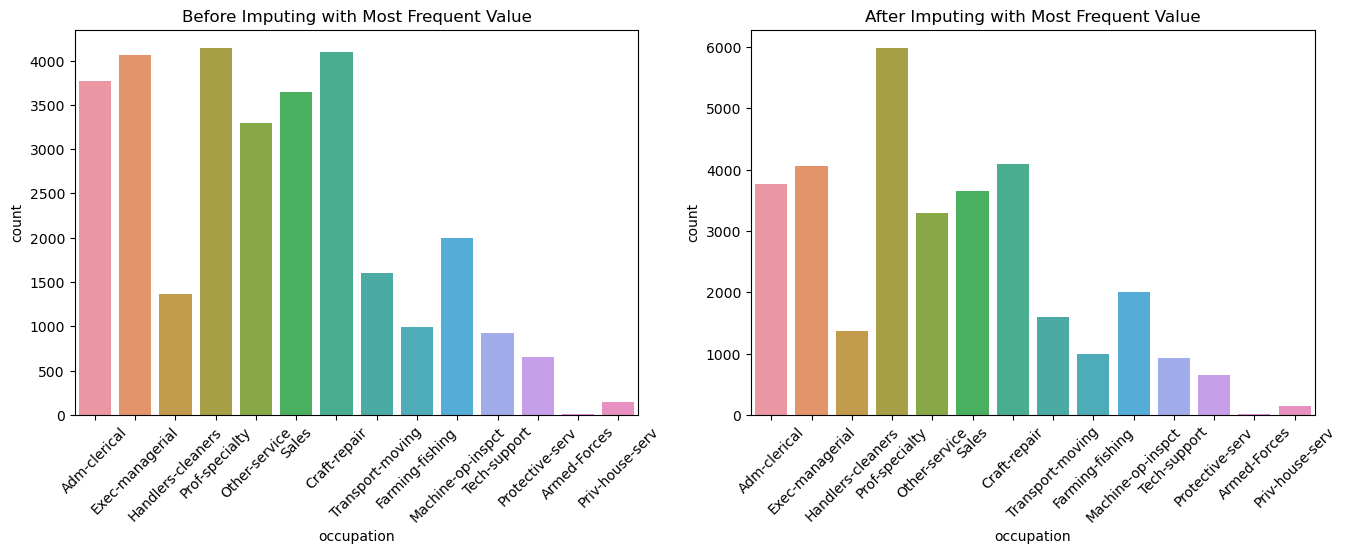

In [50]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("Before Imputing with Most Frequent Value")
sns.countplot(data = df, x = 'occupation')
plt.xticks(rotation=45)
plt.subplot(122)
plt.title("After Imputing with Most Frequent Value")
sns.countplot(data=df_new['occupation'].replace(np.nan,df['occupation'].mode()[0]),x=df_new['occupation'])
plt.xticks(rotation=45)
plt.show()

In [51]:
#creating function to check distribution after imputing ? value with suitable method
def cat_distribution(df,df_new,variable):
    tmp=pd.concat(
                [df[variable].value_counts()/len(df),
                 df_new[variable].value_counts()/len(df_new)],axis=1)
    tmp.columns=['with_nan','without_nan']
    return tmp

In [52]:
cat_distribution(df,df_new,'workclass')

with_nan  without_nan
Private           0.697030     0.753417
Self-emp-not-inc  0.078038     0.078038
Local-gov         0.064279     0.064279
State-gov         0.039864     0.039864
Self-emp-inc      0.034274     0.034274
Federal-gov       0.029483     0.029483
Without-pay       0.000430     0.000430
Never-worked      0.000215     0.000215

In [53]:
cat_distribution(df,df_new,'occupation')

with_nan  without_nan
Prof-specialty     0.127146     0.183747
Craft-repair       0.125887     0.125887
Exec-managerial    0.124873     0.124873
Adm-clerical       0.115783     0.115783
Sales              0.112097     0.112097
Other-service      0.101195     0.101195
Machine-op-inspct  0.061485     0.061485
Transport-moving   0.049046     0.049046
Handlers-cleaners  0.042075     0.042075
Farming-fishing    0.030527     0.030527
Tech-support       0.028500     0.028500
Protective-serv    0.019932     0.019932
Priv-house-serv    0.004576     0.004576
Armed-Forces       0.000276     0.000276

In [54]:
cat_distribution(df,df_new,'country')

with_nan  without_nan
United-States               0.895857     0.913762
Mexico                      0.019748     0.019748
Philippines                 0.006081     0.006081
Germany                     0.004207     0.004207
Canada                      0.003716     0.003716
Puerto-Rico                 0.003501     0.003501
El-Salvador                 0.003255     0.003255
India                       0.003071     0.003071
Cuba                        0.002918     0.002918
England                     0.002764     0.002764
Jamaica                     0.002488     0.002488
South                       0.002457     0.002457
China                       0.002303     0.002303
Italy                       0.002242     0.002242
Dominican-Republic          0.002150     0.002150
Vietnam                     0.002058     0.002058
Guatemala                   0.001966     0.001966
Japan                       0.001904     0.001904
Poland                      0.001843     0.001843
Columbia                    0.001812     0.001812
Taiwan                      0.001566     0.001566
Haiti                       0.001351     0.001351
Iran                        0.001321     0.001321
Portugal                    0.001136     0.001136
Nicaragua                   0.001044     0.001044
Peru                        0.000952     0.000952
France                      0.000891     0.000891
Greece                      0.000891     0.000891
Ecuador                     0.000860     0.000860
Ireland                     0.000737     0.000737
Hong                        0.000614     0.000614
Cambodia                    0.000584     0.000584
Trinadad&Tobago             0.000584     0.000584
Laos                        0.000553     0.000553
Thailand                    0.000553     0.000553
Yugoslavia                  0.000491     0.000491
Outlying-US(Guam-USVI-etc)  0.000430     0.000430
Honduras                    0.000399     0.000399
Hungary                     0.000399     0.000399
Scotland                    0.000369     0.000369
Holand-Netherlands          0.000031     0.000031

In [55]:
df_new['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [56]:
#combining categories from workclass column
df_new['workclass']=df_new['workclass'].replace(['Local-gov','State-gov','Federal-gov'],'gov')
df_new['workclass']=df_new['workclass'].replace(['Self-emp-not-inc','Self-emp-inc'],'self_employed')
df_new['workclass']=df_new['workclass'].replace(['Without-pay','Never-worked'],'without_pay')

In [57]:
df_new['workclass'].value_counts()

Private          24532
gov               4351
self_employed     3657
without_pay         21
Name: workclass, dtype: int64

In [58]:
df_new['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

There are lot of values in education column.so we can replace

In [59]:
df_new['education']=df_new['education'].replace(['Preschool','1st-4th','5th-6th','9th','7th-8th','10th','12th','11th'],'school')
df_new['education']=df_new['education'].replace(['HS-grad'],'high school')
df_new['education']=df_new['education'].replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'higher')
df_new['education']=df_new['education'].replace(['Bachelors'],'undergrad')
df_new['education']=df_new['education'].replace(['Masters'],'grad')
df_new['education']=df_new['education'].replace(['Doctorate'],'doc')

In [60]:
df_new['marital-status']=df_new['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
df_new['marital-status']=df_new['marital-status'].replace(['Never-married'],'not_married')
df_new['marital-status']=df_new['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'other')

In [61]:
df_new['salary']=df_new['salary'].replace(['<=50K'],0)
df_new['salary']=df_new['salary'].replace(['>=50K','>50K'],1)

In [62]:
df_new['education'].value_counts()

high school    10501
higher         10316
undergrad       5355
school          4253
grad            1723
doc              413
Name: education, dtype: int64

In [63]:
df_new['marital-status'].value_counts()

married        14999
not_married    10683
other           6879
Name: marital-status, dtype: int64

In [64]:
df_new['country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [65]:
df_new.loc[df_new['country'] != 'United-States','country']

4                      Cuba
6                   Jamaica
11                    India
15                   Mexico
27                    South
                ...        
32459                Poland
32508    Dominican-Republic
32533                 Japan
32547                Mexico
32553                Taiwan
Name: country, Length: 2808, dtype: object

In [66]:
#creating two groups in country column i.e US and Non_US
df_new.loc[df_new['country'] != 'United-States','country']='Non-US'
df_new.loc[df_new['country'] == 'United-States','country']='US'

In [67]:
df_new['country'].value_counts()

US        29753
Non-US     2808
Name: country, dtype: int64

In [68]:
df_new['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [69]:
df_new.sample(10)

age workclass  fnlwgt    education  education-num marital-status  \
26082   43   Private  122749  high school              9        married   
26930   29       gov  360527         grad             14        married   
26065   39   Private  245053    undergrad             13        married   
14388   21   Private  179720  high school              9    not_married   
26956   25   Private  470203    undergrad             13    not_married   
4193    21   Private  370990       higher             10    not_married   
9526    49   Private  185385       higher             12        married   
28185   32   Private  209538         grad             14        married   
10460   58   Private  210031  high school              9          other   
29183   42   Private   39060  high school              9        married   

            occupation    relationship   race     sex  capital-gain  \
26082     Craft-repair         Husband  White    Male             0   
26930   Prof-specialty         Husband  White    Male             0   
26065   Prof-specialty         Husband  White    Male             0   
14388    Other-service  Other-relative  White  Female             0   
26956   Prof-specialty   Not-in-family  White  Female             0   
4193             Sales       Own-child  White    Male             0   
9526             Sales         Husband  White    Male             0   
28185  Exec-managerial         Husband  White    Male             0   
10460   Prof-specialty       Unmarried  White    Male             0   
29183            Sales         Husband  White    Male             0   

       capital-loss  hours-per-week country  salary  
26082             0              55      US       0  
26930             0              40      US       1  
26065             0              50      US       1  
14388             0              30      US       0  
26956             0              30      US       0  
4193              0              40      US       0  
9526              0              45      US       0  
28185             0              55      US       1  
10460             0              40      US       0  
29183             0              60      US       1

In [70]:
px.pie(df_new,values='education-num',names='education',title='% of edu',color_discrete_sequence=px.colors.qualitative.T10)

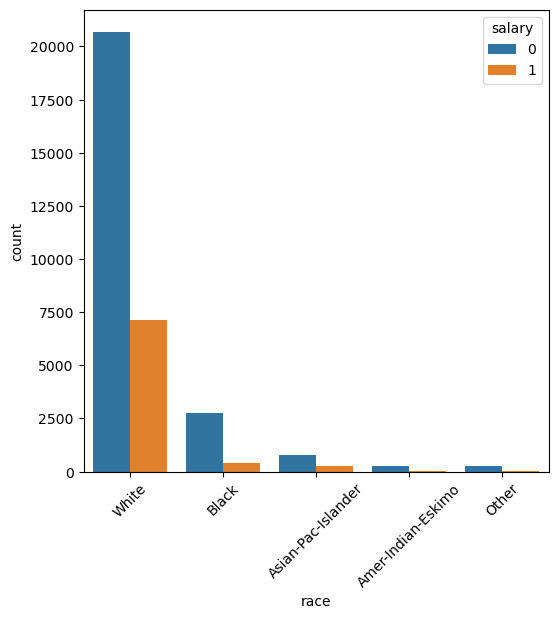

In [71]:
plt.figure(figsize=(6,6))
sns.countplot(data=df_new,x='race',hue='salary')
plt.xticks(rotation=45);

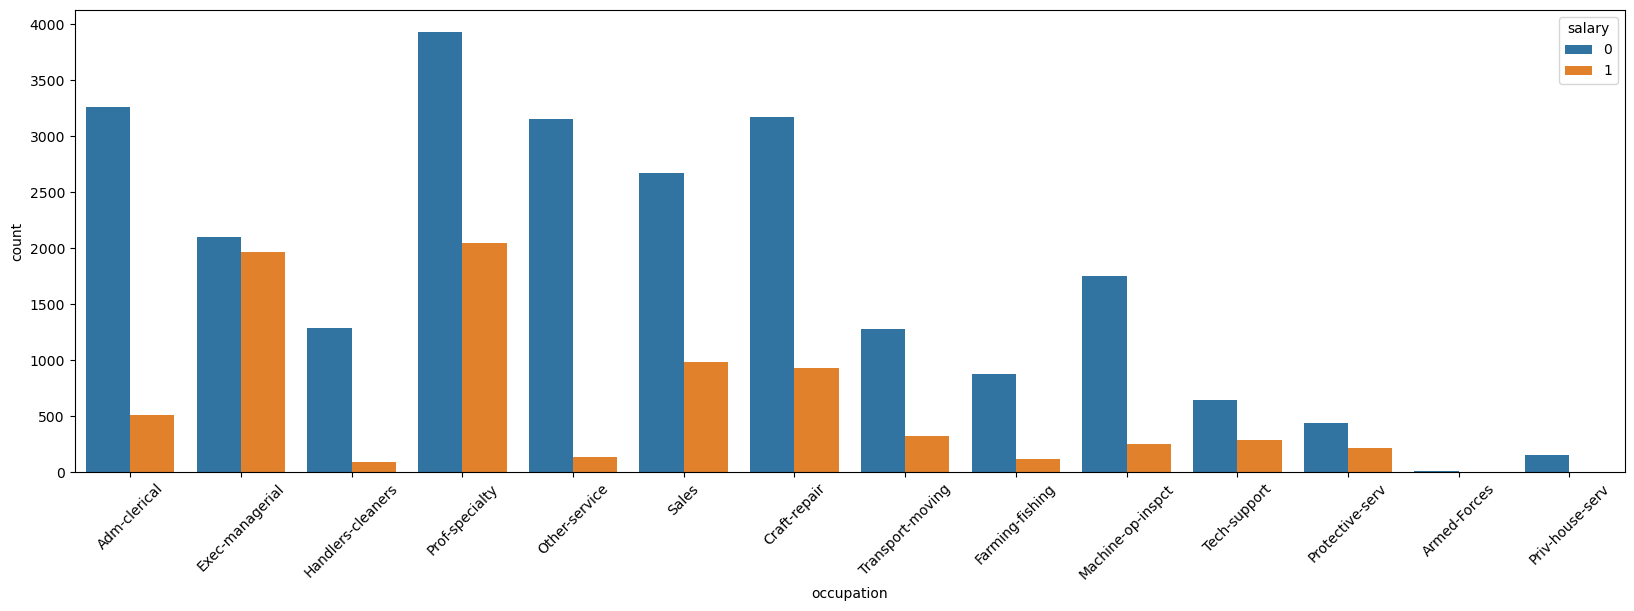

In [72]:
plt.figure(figsize=(20,6))
sns.countplot(data=df_new,x='occupation',hue='salary')
plt.xticks(rotation=45);

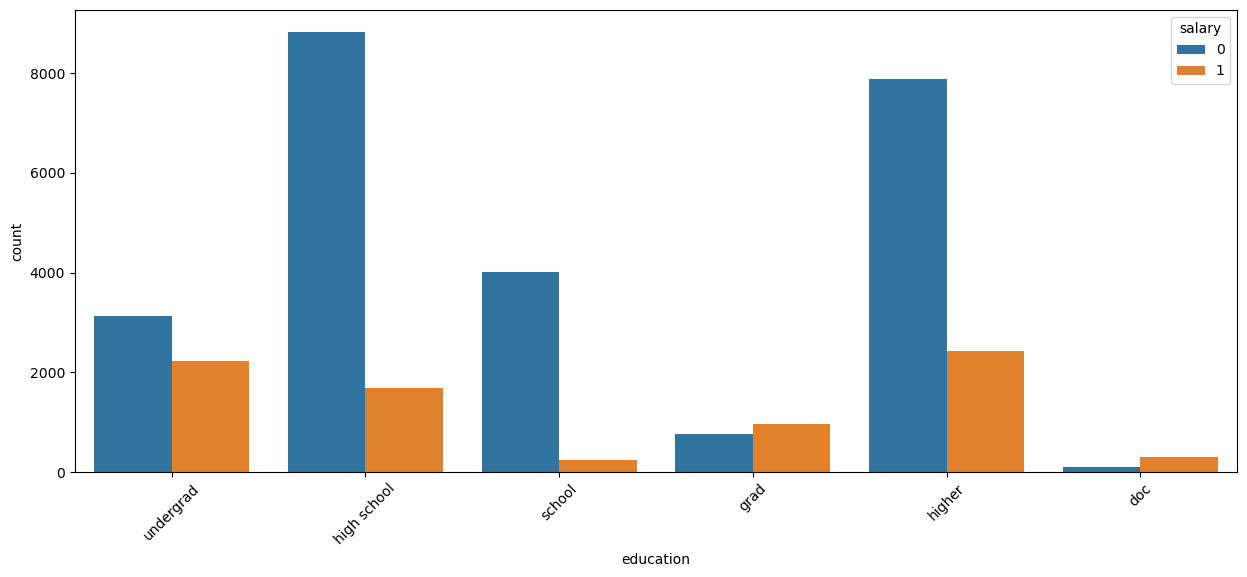

In [73]:
plt.figure(figsize=(15,6))
sns.countplot(data=df_new,x='education',hue='salary')
plt.xticks(rotation=45);

<AxesSubplot:>

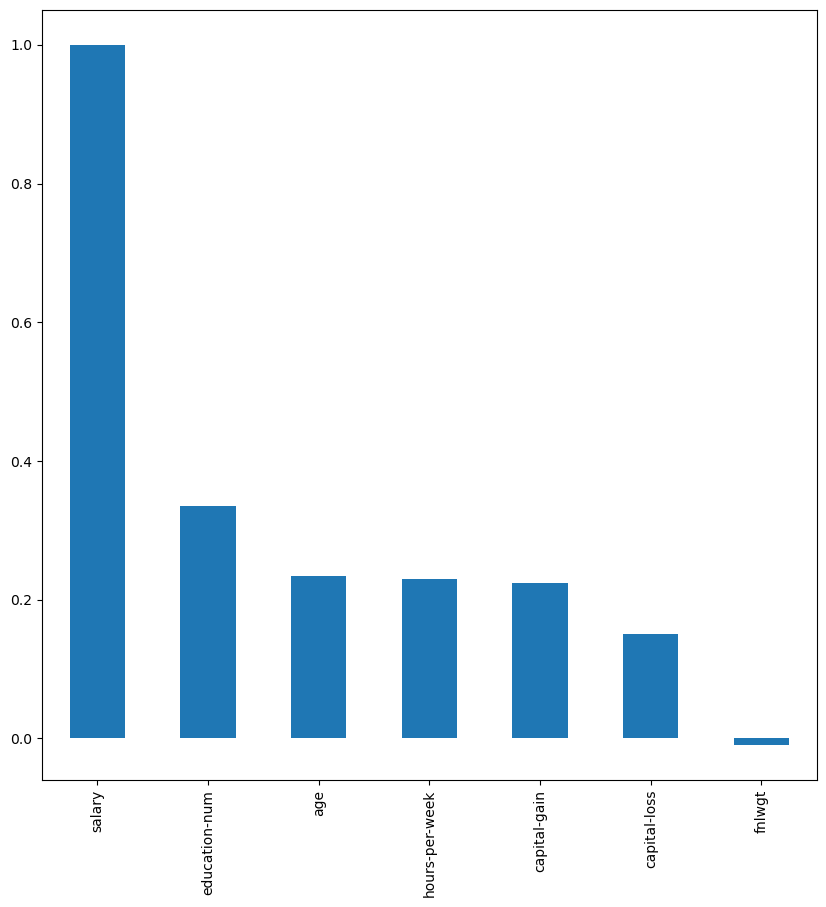

In [74]:
plt.figure(figsize=(10,10))
df_new.corr()['salary'].sort_values(ascending=False).plot(kind='bar')

In [75]:
df_new.head(10)

age      workclass  fnlwgt    education  education-num marital-status  \
0   39            gov   77516    undergrad             13    not_married   
1   50  self_employed   83311    undergrad             13        married   
2   38        Private  215646  high school              9          other   
3   53        Private  234721       school              7        married   
4   28        Private  338409    undergrad             13        married   
5   37        Private  284582         grad             14        married   
6   49        Private  160187       school              5          other   
7   52  self_employed  209642  high school              9        married   
8   31        Private   45781         grad             14    not_married   
9   42        Private  159449    undergrad             13        married   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   
5    Exec-managerial           Wife  White  Female             0   
6      Other-service  Not-in-family  Black  Female             0   
7    Exec-managerial        Husband  White    Male             0   
8     Prof-specialty  Not-in-family  White  Female         14084   
9    Exec-managerial        Husband  White    Male          5178   

   capital-loss  hours-per-week country  salary  
0             0              40      US       0  
1             0              13      US       0  
2             0              40      US       0  
3             0              40      US       0  
4             0              40  Non-US       0  
5             0              40      US       0  
6             0              16  Non-US       0  
7             0              45      US       1  
8             0              50      US       1  
9             0              40      US       1

# Feature encoding

In [76]:
df_encoded=df_new.copy()

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
for col in df_encoded.columns:
    if df_encoded[col].dtypes == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [79]:
df_encoded.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          1   77516          5             13               1   
1   50          2   83311          5             13               0   
2   38          0  215646          2              9               2   
3   53          0  234721          4              7               0   
4   28          0  338409          5             13               0   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             1     4    1          2174             0   
1           3             0     4    1             0             0   
2           5             1     4    1             0             0   
3           5             0     2    1             0             0   
4           9             5     2    0             0             0   

   hours-per-week  country  salary  
0              40        1       0  
1              13        1       0  
2              40        1       0  
3              40        1       0  
4              40        0       0

# Correlation Matric

<AxesSubplot:>

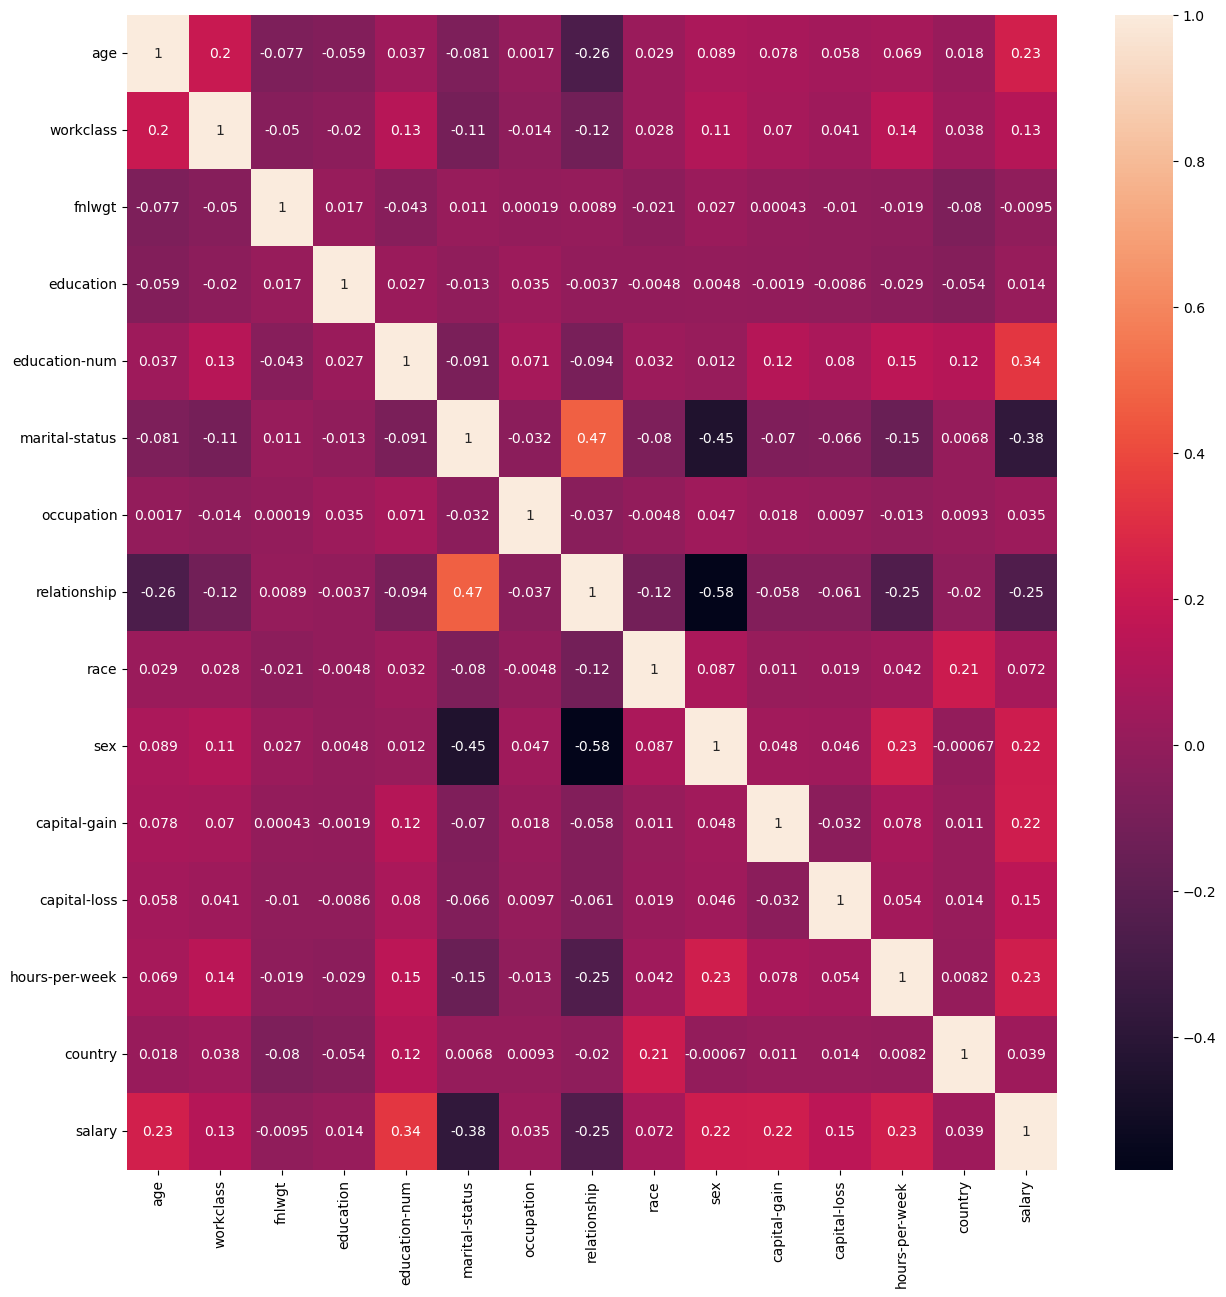

In [80]:
plt.figure(figsize=(15,15))
sns.heatmap(df_encoded.corr(),annot=True)

# Here it is quite visible that education, fnlwgt, occupation, country,race, etc have no relation with the final output income of Income hence we will be dropping these.

# BASIC MODEL BUILDING

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x=df_encoded.drop('salary',axis=1)
y=df_encoded['salary']

In [83]:
x.shape

(32561, 14)

In [84]:
y.shape

(32561,)

In [85]:
#Creation of Train and Test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=30)

In [86]:
print("shape of training set : ",x_train.shape)
print("shape of testing set : ",x_test.shape)

shape of training set :  (26048, 14)
shape of testing set :  (6513, 14)


In [87]:
print("shape of training o/p set : ",y_train.shape)
print("shape of testing o/p set : ",y_test.shape)

shape of training o/p set :  (26048,)
shape of testing o/p set :  (6513,)


In [88]:
x_train.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education-num     int64
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital-gain      int64
capital-loss      int64
hours-per-week    int64
country           int32
dtype: object

# Trying all classification algorithm with original distribution

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Using Logistic regression

In [98]:
log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [99]:
y_pred_logreg=log_reg.predict(x_test)

In [100]:
y_pred_logreg

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,r2_score,mean_squared_error,classification_report
# evaluating the model
print("Training Accuracy :", log_reg.score(x_train, y_train))
print("Testing Accuracy :", log_reg.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_logreg,y_test))
print('*'*100)
print(confusion_matrix(y_pred_logreg,y_test))
print('*'*100)
print(classification_report(y_pred_logreg,y_test))

Training Accuracy : 0.7961455773955773
Testing Accuracy : 0.800706279748196
ROC AUC Score : 0.7604875565591106
****************************************************************************************************
[[4803 1131]
 [ 167  412]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      5934
           1       0.27      0.71      0.39       579

    accuracy                           0.80      6513
   macro avg       0.62      0.76      0.63      6513
weighted avg       0.90      0.80      0.84      6513



# Using DecisionTree Classifier

In [102]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [103]:
y_pred_dtree=dtree.predict(x_test)

In [104]:
y_pred_dtree

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [105]:
# evaluating the DecisionTree Classifier model
print("Training Accuracy :", dtree.score(x_train, y_train))
print("Testing Accuracy :", dtree.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_dtree,y_test))
print('*'*100)
print(confusion_matrix(y_pred_dtree,y_test))
print('*'*100)
print(classification_report(y_pred_dtree,y_test))

Training Accuracy : 0.9999616093366094
Testing Accuracy : 0.8240442192538001
ROC AUC Score : 0.7567595332018409
****************************************************************************************************
[[4408  584]
 [ 562  959]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4992
           1       0.62      0.63      0.63      1521

    accuracy                           0.82      6513
   macro avg       0.75      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513



# Using Randome Forest classifier

In [106]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [107]:
y_pred_rf=rf.predict(x_test)

In [108]:
y_pred_rf

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [109]:
# evaluating the RandomeForest model
print("Training Accuracy :", rf.score(x_train, y_train))
print("Testing Accuracy :", rf.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_rf,y_test))
print('*'*100)
print(confusion_matrix(y_pred_rf,y_test))
print('*'*100)
print(classification_report(y_pred_rf,y_test))

Training Accuracy : 0.9999616093366094
Testing Accuracy : 0.8628896054045755
ROC AUC Score : 0.8231314260474164
****************************************************************************************************
[[4666  589]
 [ 304  954]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      5255
           1       0.62      0.76      0.68      1258

    accuracy                           0.86      6513
   macro avg       0.78      0.82      0.80      6513
weighted avg       0.88      0.86      0.87      6513



# Using xgboost model

In [110]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [111]:
y_pred_xgb=xgb.predict(x_test)

In [112]:
y_pred_xgb

array([0, 1, 0, ..., 1, 0, 0])

In [113]:
# evaluating the XGBClassifier model
print("Training Accuracy :", xgb.score(x_train, y_train))
print("Testing Accuracy :", xgb.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_xgb,y_test))
print('*'*100)
print(confusion_matrix(y_pred_xgb,y_test))
print('*'*100)
print(classification_report(y_pred_xgb,y_test))

Training Accuracy : 0.9085150491400491
Testing Accuracy : 0.8685705512052817
ROC AUC Score : 0.8310594524178515
****************************************************************************************************
[[4676  562]
 [ 294  981]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      5238
           1       0.64      0.77      0.70      1275

    accuracy                           0.87      6513
   macro avg       0.79      0.83      0.81      6513
weighted avg       0.88      0.87      0.87      6513



# Using KNN Clssifier

In [114]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [115]:
y_pred_knn=knn.predict(x_test)

In [116]:
y_pred_knn

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [117]:
# evaluating the KNeighborsClassifier model
print("Training Accuracy :", knn.score(x_train, y_train))
print("Testing Accuracy :", knn.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_knn,y_test))
print('*'*100)
print(confusion_matrix(y_pred_knn,y_test))
print('*'*100)
print(classification_report(y_pred_knn,y_test))

Training Accuracy : 0.8331925675675675
Testing Accuracy : 0.7790572700752342
ROC AUC Score : 0.6862026348444491
****************************************************************************************************
[[4577 1046]
 [ 393  497]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      5623
           1       0.32      0.56      0.41       890

    accuracy                           0.78      6513
   macro avg       0.62      0.69      0.64      6513
weighted avg       0.84      0.78      0.80      6513



# Using Naive Bayes

In [118]:
nb= GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [119]:
y_pred_nb=nb.predict(x_test)

In [120]:
y_pred_nb

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
# evaluating the Naive Bayes model
print("Training Accuracy :", nb.score(x_train, y_train))
print("Testing Accuracy :", nb.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_nb,y_test))
print('*'*100)
print(confusion_matrix(y_pred_nb,y_test))
print('*'*100)
print(classification_report(y_pred_nb,y_test))

Training Accuracy : 0.793458230958231
Testing Accuracy : 0.8000921234454169
ROC AUC Score : 0.7390580108527381
****************************************************************************************************
[[4713 1045]
 [ 257  498]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      5758
           1       0.32      0.66      0.43       755

    accuracy                           0.80      6513
   macro avg       0.64      0.74      0.66      6513
weighted avg       0.88      0.80      0.83      6513



# Using support vector classifier

In [122]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [123]:
y_pred_svc=svc.predict(x_test)

In [124]:
y_pred_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [125]:
# evaluating the SVC model
print("Training Accuracy :", svc.score(x_train, y_train))
print("Testing Accuracy :", svc.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_svc,y_test))
print('*'*100)
print(confusion_matrix(y_pred_svc,y_test))
print('*'*100)
print(classification_report(y_pred_svc,y_test))

Training Accuracy : 0.7948019041769042
Testing Accuracy : 0.797328420082911
ROC AUC Score : 0.8749581585838896
****************************************************************************************************
[[4960 1310]
 [  10  233]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      6270
           1       0.15      0.96      0.26       243

    accuracy                           0.80      6513
   macro avg       0.57      0.87      0.57      6513
weighted avg       0.97      0.80      0.86      6513



# Using AdaboostClassifier

In [126]:
adaboost=AdaBoostClassifier()
adaboost.fit(x_train,y_train)

AdaBoostClassifier()

In [127]:
y_pred_adaboost=adaboost.predict(x_test)

In [128]:
y_pred_adaboost

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [129]:
# evaluating the AdaBoostClassifier model
print("Training Accuracy :", adaboost.score(x_train, y_train))
print("Testing Accuracy :", adaboost.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_adaboost,y_test))
print('*'*100)
print(confusion_matrix(y_pred_adaboost,y_test))
print('*'*100)
print(classification_report(y_pred_adaboost,y_test))

Training Accuracy : 0.8602963759213759
Testing Accuracy : 0.8604329801934593
ROC AUC Score : 0.825645927572818
****************************************************************************************************
[[4703  642]
 [ 267  901]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      5345
           1       0.58      0.77      0.66      1168

    accuracy                           0.86      6513
   macro avg       0.77      0.83      0.79      6513
weighted avg       0.88      0.86      0.87      6513



# Using GradientBoostingClassifier model

In [130]:
gradboost=GradientBoostingClassifier()
gradboost.fit(x_train,y_train)

GradientBoostingClassifier()

In [131]:
y_pred_gradboost=gradboost.predict(x_test)

In [132]:
y_pred_gradboost

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [133]:
# evaluating the GradientBoostingClassifier model
print("Training Accuracy :", gradboost.score(x_train, y_train))
print("Testing Accuracy :", gradboost.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_gradboost,y_test))
print('*'*100)
print(confusion_matrix(y_pred_gradboost,y_test))
print('*'*100)
print(classification_report(y_pred_gradboost,y_test))

Training Accuracy : 0.8680512899262899
Testing Accuracy : 0.8682634730538922
ROC AUC Score : 0.840503174023464
****************************************************************************************************
[[4737  625]
 [ 233  918]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      5362
           1       0.59      0.80      0.68      1151

    accuracy                           0.87      6513
   macro avg       0.77      0.84      0.80      6513
weighted avg       0.89      0.87      0.88      6513



# Using CatBoostClassifier model

In [134]:
cbc=CatBoostClassifier()
cbc.fit(x_train,y_train);

Learning rate set to 0.041445
0:	learn: 0.6491471	total: 188ms	remaining: 3m 8s
1:	learn: 0.6137341	total: 206ms	remaining: 1m 42s
2:	learn: 0.5815263	total: 222ms	remaining: 1m 13s
3:	learn: 0.5521358	total: 238ms	remaining: 59.4s
4:	learn: 0.5279810	total: 254ms	remaining: 50.6s
5:	learn: 0.5057362	total: 271ms	remaining: 44.8s
6:	learn: 0.4858493	total: 287ms	remaining: 40.6s
7:	learn: 0.4695138	total: 302ms	remaining: 37.5s
8:	learn: 0.4535623	total: 318ms	remaining: 35s
9:	learn: 0.4414791	total: 334ms	remaining: 33.1s
10:	learn: 0.4306531	total: 349ms	remaining: 31.4s
11:	learn: 0.4209397	total: 365ms	remaining: 30.1s
12:	learn: 0.4103928	total: 381ms	remaining: 28.9s
13:	learn: 0.4018203	total: 397ms	remaining: 28s
14:	learn: 0.3931213	total: 417ms	remaining: 27.4s
15:	learn: 0.3861445	total: 432ms	remaining: 26.6s
16:	learn: 0.3799249	total: 448ms	remaining: 25.9s
17:	learn: 0.3745594	total: 467ms	remaining: 25.5s
18:	learn: 0.3697646	total: 486ms	remaining: 25.1s
19:	learn: 0.

171:	learn: 0.2857495	total: 3s	remaining: 14.4s
172:	learn: 0.2855646	total: 3.01s	remaining: 14.4s
173:	learn: 0.2854420	total: 3.03s	remaining: 14.4s
174:	learn: 0.2853163	total: 3.04s	remaining: 14.4s
175:	learn: 0.2851965	total: 3.06s	remaining: 14.3s
176:	learn: 0.2850574	total: 3.08s	remaining: 14.3s
177:	learn: 0.2849697	total: 3.09s	remaining: 14.3s
178:	learn: 0.2848764	total: 3.11s	remaining: 14.3s
179:	learn: 0.2847835	total: 3.12s	remaining: 14.2s
180:	learn: 0.2847079	total: 3.14s	remaining: 14.2s
181:	learn: 0.2846039	total: 3.15s	remaining: 14.2s
182:	learn: 0.2845055	total: 3.17s	remaining: 14.1s
183:	learn: 0.2843814	total: 3.19s	remaining: 14.1s
184:	learn: 0.2843029	total: 3.21s	remaining: 14.1s
185:	learn: 0.2841817	total: 3.22s	remaining: 14.1s
186:	learn: 0.2841001	total: 3.24s	remaining: 14.1s
187:	learn: 0.2840187	total: 3.26s	remaining: 14.1s
188:	learn: 0.2838161	total: 3.28s	remaining: 14.1s
189:	learn: 0.2837112	total: 3.29s	remaining: 14s
190:	learn: 0.283

332:	learn: 0.2687492	total: 5.58s	remaining: 11.2s
333:	learn: 0.2686415	total: 5.6s	remaining: 11.2s
334:	learn: 0.2685591	total: 5.62s	remaining: 11.1s
335:	learn: 0.2684725	total: 5.63s	remaining: 11.1s
336:	learn: 0.2683904	total: 5.65s	remaining: 11.1s
337:	learn: 0.2683272	total: 5.66s	remaining: 11.1s
338:	learn: 0.2682598	total: 5.68s	remaining: 11.1s
339:	learn: 0.2681978	total: 5.69s	remaining: 11.1s
340:	learn: 0.2681003	total: 5.71s	remaining: 11s
341:	learn: 0.2680379	total: 5.72s	remaining: 11s
342:	learn: 0.2679594	total: 5.74s	remaining: 11s
343:	learn: 0.2678698	total: 5.75s	remaining: 11s
344:	learn: 0.2677645	total: 5.77s	remaining: 11s
345:	learn: 0.2677212	total: 5.79s	remaining: 10.9s
346:	learn: 0.2676653	total: 5.8s	remaining: 10.9s
347:	learn: 0.2676102	total: 5.82s	remaining: 10.9s
348:	learn: 0.2675188	total: 5.83s	remaining: 10.9s
349:	learn: 0.2674207	total: 5.85s	remaining: 10.9s
350:	learn: 0.2673324	total: 5.87s	remaining: 10.8s
351:	learn: 0.2671309	to

495:	learn: 0.2574130	total: 8.18s	remaining: 8.31s
496:	learn: 0.2573547	total: 8.2s	remaining: 8.3s
497:	learn: 0.2572930	total: 8.21s	remaining: 8.28s
498:	learn: 0.2572402	total: 8.23s	remaining: 8.26s
499:	learn: 0.2571746	total: 8.25s	remaining: 8.25s
500:	learn: 0.2571310	total: 8.26s	remaining: 8.23s
501:	learn: 0.2570338	total: 8.28s	remaining: 8.21s
502:	learn: 0.2569760	total: 8.29s	remaining: 8.19s
503:	learn: 0.2569075	total: 8.31s	remaining: 8.18s
504:	learn: 0.2568652	total: 8.32s	remaining: 8.16s
505:	learn: 0.2567799	total: 8.34s	remaining: 8.14s
506:	learn: 0.2567126	total: 8.36s	remaining: 8.13s
507:	learn: 0.2566497	total: 8.37s	remaining: 8.11s
508:	learn: 0.2566035	total: 8.39s	remaining: 8.09s
509:	learn: 0.2565394	total: 8.4s	remaining: 8.07s
510:	learn: 0.2564879	total: 8.42s	remaining: 8.06s
511:	learn: 0.2564465	total: 8.44s	remaining: 8.04s
512:	learn: 0.2563936	total: 8.45s	remaining: 8.02s
513:	learn: 0.2563712	total: 8.46s	remaining: 8s
514:	learn: 0.2563

664:	learn: 0.2490638	total: 11.2s	remaining: 5.65s
665:	learn: 0.2490321	total: 11.2s	remaining: 5.63s
666:	learn: 0.2489979	total: 11.3s	remaining: 5.62s
667:	learn: 0.2489620	total: 11.3s	remaining: 5.6s
668:	learn: 0.2489256	total: 11.3s	remaining: 5.58s
669:	learn: 0.2489019	total: 11.3s	remaining: 5.57s
670:	learn: 0.2488402	total: 11.3s	remaining: 5.55s
671:	learn: 0.2487984	total: 11.3s	remaining: 5.54s
672:	learn: 0.2487434	total: 11.4s	remaining: 5.52s
673:	learn: 0.2486998	total: 11.4s	remaining: 5.5s
674:	learn: 0.2486579	total: 11.4s	remaining: 5.49s
675:	learn: 0.2486275	total: 11.4s	remaining: 5.47s
676:	learn: 0.2485388	total: 11.4s	remaining: 5.46s
677:	learn: 0.2484967	total: 11.5s	remaining: 5.44s
678:	learn: 0.2484495	total: 11.5s	remaining: 5.43s
679:	learn: 0.2484220	total: 11.5s	remaining: 5.41s
680:	learn: 0.2484040	total: 11.5s	remaining: 5.4s
681:	learn: 0.2483569	total: 11.5s	remaining: 5.38s
682:	learn: 0.2483186	total: 11.6s	remaining: 5.37s
683:	learn: 0.2

826:	learn: 0.2415951	total: 14.2s	remaining: 2.97s
827:	learn: 0.2415401	total: 14.2s	remaining: 2.95s
828:	learn: 0.2414586	total: 14.2s	remaining: 2.94s
829:	learn: 0.2414110	total: 14.3s	remaining: 2.92s
830:	learn: 0.2413498	total: 14.3s	remaining: 2.91s
831:	learn: 0.2412795	total: 14.3s	remaining: 2.89s
832:	learn: 0.2412436	total: 14.3s	remaining: 2.88s
833:	learn: 0.2411821	total: 14.4s	remaining: 2.86s
834:	learn: 0.2411376	total: 14.4s	remaining: 2.85s
835:	learn: 0.2410826	total: 14.4s	remaining: 2.83s
836:	learn: 0.2410242	total: 14.5s	remaining: 2.82s
837:	learn: 0.2409749	total: 14.5s	remaining: 2.8s
838:	learn: 0.2409061	total: 14.5s	remaining: 2.79s
839:	learn: 0.2408477	total: 14.6s	remaining: 2.77s
840:	learn: 0.2407814	total: 14.6s	remaining: 2.75s
841:	learn: 0.2407312	total: 14.6s	remaining: 2.74s
842:	learn: 0.2406895	total: 14.6s	remaining: 2.72s
843:	learn: 0.2406370	total: 14.6s	remaining: 2.71s
844:	learn: 0.2405820	total: 14.7s	remaining: 2.69s
845:	learn: 0

991:	learn: 0.2345114	total: 17.2s	remaining: 138ms
992:	learn: 0.2344827	total: 17.2s	remaining: 121ms
993:	learn: 0.2344156	total: 17.2s	remaining: 104ms
994:	learn: 0.2343765	total: 17.2s	remaining: 86.5ms
995:	learn: 0.2343432	total: 17.2s	remaining: 69.2ms
996:	learn: 0.2342507	total: 17.2s	remaining: 51.9ms
997:	learn: 0.2341891	total: 17.3s	remaining: 34.6ms
998:	learn: 0.2341373	total: 17.3s	remaining: 17.3ms
999:	learn: 0.2340948	total: 17.3s	remaining: 0us


In [135]:
y_pred_cbc=cbc.predict(x_test)

In [136]:
y_pred_cbc

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [137]:
# evaluating the CatBoostClassifier() model
print("Training Accuracy :", cbc.score(x_train, y_train))
print("Testing Accuracy :", cbc.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_cbc,y_test))
print('*'*100)
print(confusion_matrix(y_pred_cbc,y_test))
print('*'*100)
print(classification_report(y_pred_cbc,y_test))

Training Accuracy : 0.898495085995086
Testing Accuracy : 0.8739444188545985
ROC AUC Score : 0.8413276639907986
****************************************************************************************************
[[4705  556]
 [ 265  987]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      5261
           1       0.64      0.79      0.71      1252

    accuracy                           0.87      6513
   macro avg       0.79      0.84      0.81      6513
weighted avg       0.89      0.87      0.88      6513



# Basic Model Selection

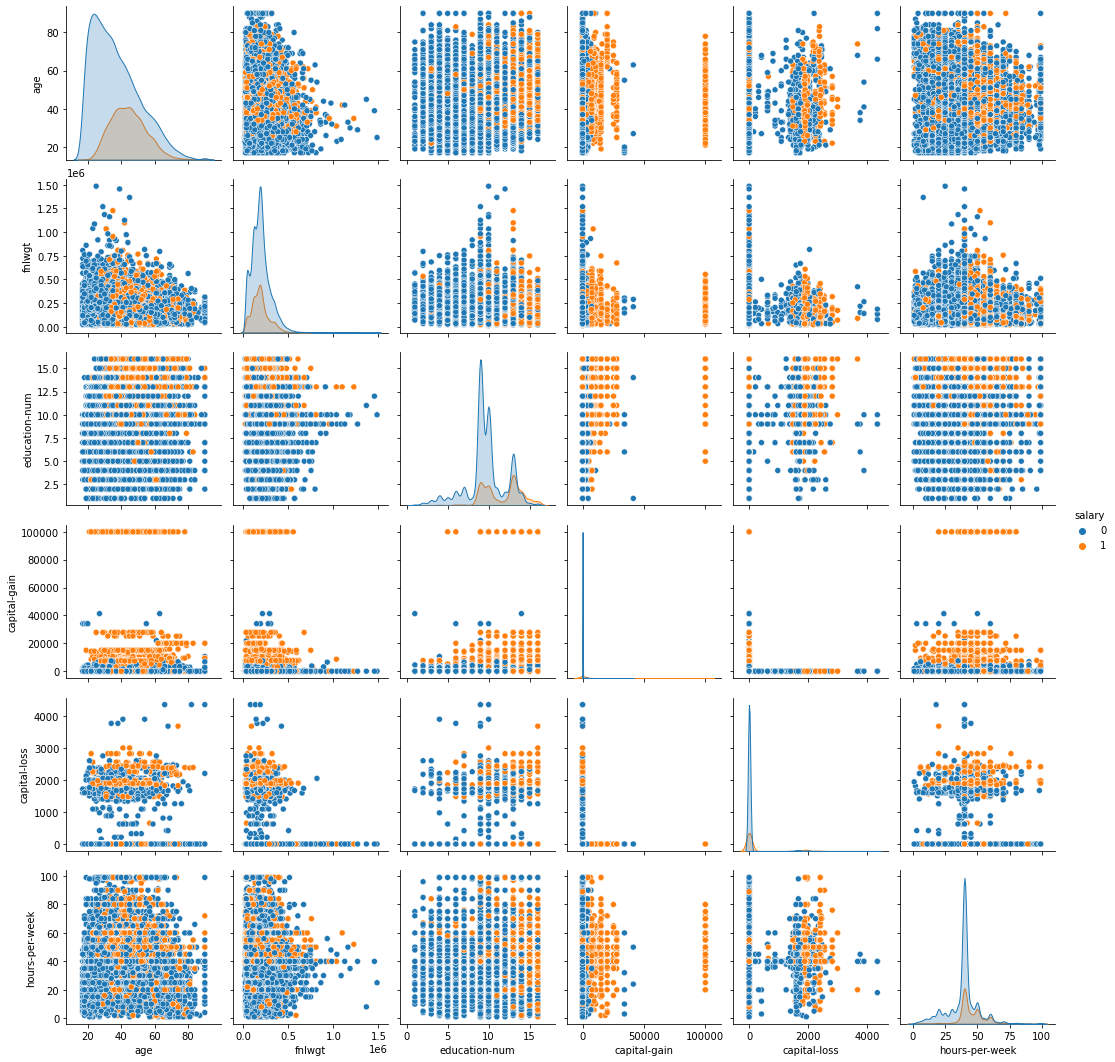

In [168]:
sns.pairplot(df_new,hue='salary')

# So base upon above results we select 3 classifier for further Hyper parameter tuning

1. RandomeForestClassifier

2. XgBoost

3. CatBoostClassifier